In [2]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from matplotlib import rc

import matplotlib.patches as mpatches
import matplotlib.lines as mlines

import sys
import math
import pickle


import itertools



In [2]:

#FUNCTION
def partition_N(n):
    '''do the partition of a complete graph'''
    indexs = range(n)
    pairs_all = []

    swap_even = [i + pow(-1, i) for i in range(n)]

    swap_odd = [0]
    swap_odd.extend([i + pow(-1, i+1) for i in range(1,n-1)])
    swap_odd.append(n-1)

    pairs_even = [(i, i+1) for i in range(0, n, 2)]
    indexs = np.array(indexs)[swap_even]   ### indexs after swap even
    #     print('\nindexs after swap {}: {}'.format(0, indexs))
    pairs_all.append(pairs_even)
    for i in range(1, n):
        if (i%2)==1:
            pair_odd = [(indexs[i], indexs[i+1]) for i in range(1, n-1, 2)]
            pairs_all.append(pair_odd)
            indexs = np.array(indexs)[swap_odd]   ### indexs after swap even
    #             print('\nindexs after swap {}: {}'.format(i, indexs))

        elif (i%2)==0:
            pair_even = [(indexs[i], indexs[i+1]) for i in range(0, n-1, 2)]
            pairs_all.append(pair_even)
            indexs = np.array(indexs)[swap_even]   ### indexs after swap even
    #             print('\nindexs after swap {}: {}'.format(i, indexs))

    return pairs_all

def partition_graph(G):
    """
    Partition the edges of a given graph.
    G: Input graph (not necessarily complete)
    Returns: List of edge partitions
    """
    edges = list(G.edges())  # Get the edges of the graph
    n = G.number_of_nodes()  # Number of nodes in the graph
    pairs_all = []

    # Swapping indices for even and odd iterations
    swap_even = [i + pow(-1, i) for i in range(n)]
    swap_odd = [0]
    swap_odd.extend([i + pow(-1, i + 1) for i in range(1, n - 1)])
    swap_odd.append(n - 1)

    # Initial indices and first partition
    indexs = list(range(n))
    pairs_even = [(i, i + 1) for i in range(0, n, 2) if (i, i + 1) in edges or (i + 1, i) in edges]
    indexs = np.array(indexs)[swap_even]  # Apply initial swap
    pairs_all.append(pairs_even)

    # Iterate to create partitions
    for i in range(1, n):
        if i % 2 == 1:
            pair_odd = [(indexs[j], indexs[j + 1]) for j in range(1, n - 1, 2)
                        if (indexs[j], indexs[j + 1]) in edges or (indexs[j + 1], indexs[j]) in edges]
            pairs_all.append(pair_odd)
            indexs = np.array(indexs)[swap_odd]  # Swap for odd iteration
        else:
            pair_even = [(indexs[j], indexs[j + 1]) for j in range(0, n - 1, 2)
                         if (indexs[j], indexs[j + 1]) in edges or (indexs[j + 1], indexs[j]) in edges]
            pairs_all.append(pair_even)
            indexs = np.array(indexs)[swap_even]  # Swap for even iteration

    return pairs_all


In [3]:
def compute_cvar(probabilities, values, alpha):
    """
    Auxilliary method to compute the conditional value at risk.

    Args:
        probabilities (List[Real]): The probabilities for measuring a bit string
        values (List[Real]): The corresponding energy values
        alpha (Real): Confidence level for the conditional value at risk

    Returns:
        cvar (Real): The conditional value at risk
    """
    
    sorted_indices = np.argsort(values)
    probs = np.array(probabilities)[sorted_indices]
    vals = np.array(values)[sorted_indices]

    cvar = 0
    total_prob = 0
    for i, (p, v) in enumerate(zip(probs, vals)):
        if p >= alpha - total_prob:
            p = alpha - total_prob
        total_prob += p
        cvar += p * v
        if abs(total_prob - alpha) < 1e-8:
            break

    cvar /= total_prob

    return cvar

# Iterative Adap various graphs


tau =  0.3 alpha =  0.01 qubits =  14 parameters = 56
error N, r =  0 56
error N, r =  1 56
error N, r =  2 56
error N, r =  3 56
error N, r =  4 56
error N, r =  5 56
error N, r =  6 56
error N, r =  7 56
error N, r =  8 56
error N, r =  9 56
error N, r =  10 56
error N, r =  11 56
error N, r =  12 56
error N, r =  13 56
error N, r =  14 56
error N, r =  15 56
error N, r =  16 56
error N, r =  17 56
error N, r =  18 56
error N, r =  19 56
error N, r =  20 56
error N, r =  21 56
error N, r =  22 56
error N, r =  23 56
error N, r =  24 56
error N, r =  25 56
error N, r =  26 56
error N, r =  27 56
error N, r =  28 56
error N, r =  29 56
error N, r =  30 56
error N, r =  31 56
error N, r =  32 56
error N, r =  33 56
error N, r =  34 56
error N, r =  35 56
error N, r =  36 56
error N, r =  37 56
error N, r =  38 56
error N, r =  39 56
error N, r =  40 56
error N, r =  41 56
error N, r =  42 56
error N, r =  43 56
error N, r =  44 56
error N, r =  45 56
error N, r =  46 56
error N, r =  4

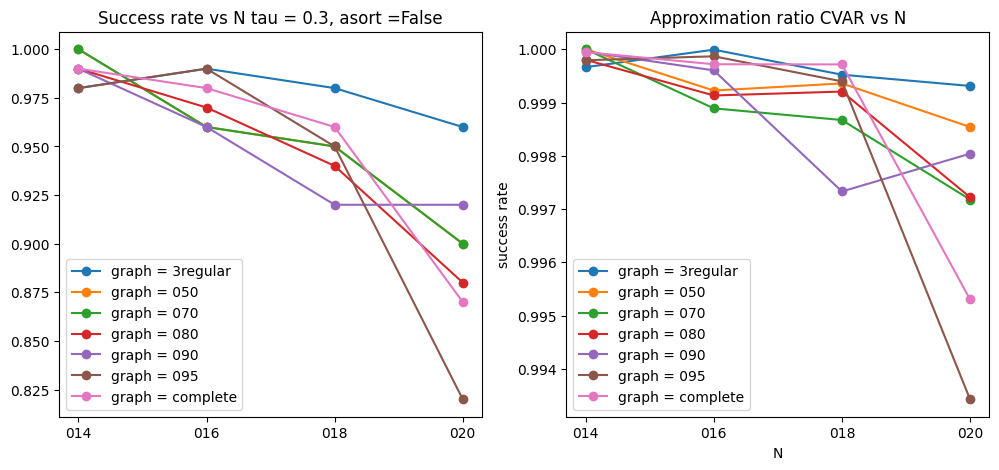

In [4]:
num_variables_list = [str(num).zfill(3) for num in range(14,22, 2)] 
graph_type_list = [ '3regular', '050', '070', '080', '090', '095','complete']

r_list = range(100)
tau_list =[0.3] # [0.3, 0.4]
alpha_list = [0.01]
layer = 1
shots = None
tot_steps = range(5)
if_adsorting = False

num_opt_list = [1,2,3]
color_list = ["green", "blue", "red"]
f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

for graph in graph_type_list:

    dir_0 = './data_iter_adap_sorting' + '/graph_{}/shots_{}'\
                            .format(graph,  shots)
    
    sr_array = np.zeros((len(num_opt_list), len(num_variables_list)))
    ar_array = np.zeros(len(num_variables_list))

    for n_qubits_i, num_variables in enumerate(num_variables_list):
        n_qubits = int(num_variables)

        N = n_qubits
        
        if graph == 'complete':
            # pairs_all = list(itertools.chain.from_iterable(partition_N(n_qubits)))
            # num_pairs = len(pairs_all)
            # num_params = (n_qubits + 2*num_pairs) * layer
            # print(num_pairs, num_params)
            num_params = int(2*(N-1)*N/2 + N)
        elif graph == '3regular':
            num_params= int(2*(3*N)/2 + N)
        else:
            density = float(f"0.{int(graph)}")
            num_params = 2*round((N-1)*N*density/2) +N

        for alpha in alpha_list:

            for taui, tau in enumerate(tau_list):
                print("\ntau = ", tau, "alpha = ", alpha, "qubits = ", N, "parameters =", num_params)

                dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}'\
                                    .format(num_variables, num_params, layer, alpha)
                
                for r in r_list:
                    # filename = f"./data_sorting/ansatz_type_structure_like_qubo_YZ_2/shots_None/layer_1/alpha_{alpha}/initial_warm_start_measure/r_{r}/tau_{tau}_random.pkl"
                    
                    file_dir_name = dir_name + '/r_{}'\
                                .format(r)
                    
                    filename = file_dir_name + '/ifadsorting_{}_tau_{}.pkl'\
                                                            .format(if_adsorting,tau)
                    with open(filename, 'rb') as f:
                        data = pickle.load(f)

                    params_list = data["params_list"]
                    if len(params_list) != round(num_params*2):
                        print("error N, r = ", r, len(params_list))
                        
                    steps_exp_poss_dict = data["steps_exp_poss_dict"]
                    steps_cvar_dict = data["steps_cvar_dict"]
                    steps_entropy_dict = data["steps_entropy_dict"]
                    
                    final_exp_poss = steps_exp_poss_dict[f"step_{len(tot_steps)-1}"]["l_1"]
                    poss_list = list(final_exp_poss.values())
                    if poss_list[0] > alpha:
                        sr_array[0, n_qubits_i] += 1/len(r_list)
                    if sum(poss_list[:2]) > alpha:
                        sr_array[1, n_qubits_i] += 1/len(r_list)
                    if sum(poss_list[:3]) > alpha:
                        sr_array[2, n_qubits_i] += 1/len(r_list)

                    exp_opt = list(final_exp_poss.keys())[0]
                    cvar = steps_cvar_dict[f"step_{len(tot_steps)-1}"]
                    ar_array[n_qubits_i] += (cvar/exp_opt) / len(r_list)

    # print("sr_array = ", sr_array)
    ax1.plot(num_variables_list, sr_array[0], "o-", label=f"graph = {graph}")
    # ax1.plot(tau_list, sr_array[1], "o--",label=f"alpha = {alpha}, num_opt = 2")
    # ax1.plot(tau_list, sr_array[2], "o:",label=f"alpha = {alpha}, num_opt = 3")

    ax2.plot(num_variables_list, ar_array, "o-", label=f"graph = {graph}")
    # print("ar_array = ", ar_array)

    ax1.set_title(f'Success rate vs N tau = {tau}, asort ={if_adsorting}')
    ax2.set_title('Approximation ratio CVAR vs N')

    ax1.legend()
plt.legend()
plt.xlabel("N")
plt.ylabel("success rate")
plt.show()



In [14]:
num_variables_list = [str(num).zfill(3) for num in range(20,22, 2)] 
graph_type_list = [ '3regular', '050', '070', '080', '090', '095','complete']

for graph in graph_type_list:

    for n_qubits_i, num_variables in enumerate(num_variables_list):
        n_qubits = int(num_variables)

        N = n_qubits
        
        if graph == 'complete':
            # pairs_all = list(itertools.chain.from_iterable(partition_N(n_qubits)))
            # num_pairs = len(pairs_all)
            # num_params = (n_qubits + 2*num_pairs) * layer
            # print(num_pairs, num_params)
            num_params = int(2*(N-1)*N/2 + N)
            edges = (N-1)*N/2
        elif graph == '3regular':
            num_params= int(2*(3*N)/2 + N)
            edges = int((3*N)/2 )
        else:
            density = float(f"0.{int(graph)}")
            num_params = 2*round((N-1)*N*density/2) +N
            edges = round((N-1)*N*density/2) 

        print('n_qubits', n_qubits, 'graph', graph, 'edges', edges)

n_qubits 20 graph 3regular edges 30
n_qubits 20 graph 050 edges 95
n_qubits 20 graph 070 edges 133
n_qubits 20 graph 080 edges 152
n_qubits 20 graph 090 edges 171
n_qubits 20 graph 095 edges 180
n_qubits 20 graph complete edges 190.0



tau =  0.3 alpha =  0.01 qubits =  14 parameters = 56
error N, r =  0 56
error N, r =  1 56
error N, r =  2 56
error N, r =  3 56
error N, r =  4 56
error N, r =  5 56
error N, r =  6 56
error N, r =  7 56
error N, r =  8 56
error N, r =  9 56
error N, r =  10 56
error N, r =  11 56
error N, r =  12 56
error N, r =  13 56
error N, r =  14 56
error N, r =  15 56
error N, r =  16 56
error N, r =  17 56
error N, r =  18 56
error N, r =  19 56
error N, r =  20 56
error N, r =  21 56
error N, r =  22 56
error N, r =  23 56
error N, r =  24 56
error N, r =  25 56
error N, r =  26 56
error N, r =  27 56
error N, r =  28 56
error N, r =  29 56
error N, r =  30 56
error N, r =  31 56
error N, r =  32 56
error N, r =  33 56
error N, r =  34 56
error N, r =  35 56
error N, r =  36 56
error N, r =  37 56
error N, r =  38 56
error N, r =  39 56
error N, r =  40 56
error N, r =  41 56
error N, r =  42 56
error N, r =  43 56
error N, r =  44 56
error N, r =  45 56
error N, r =  46 56
error N, r =  4

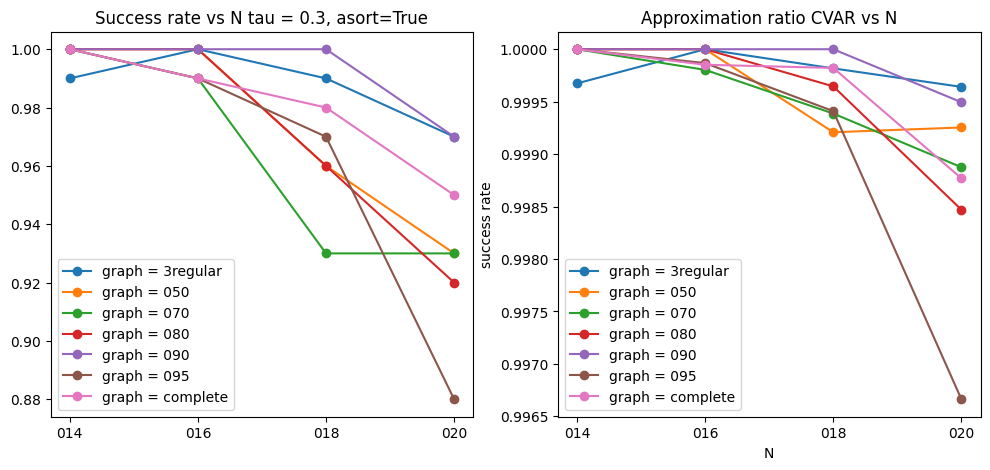

In [5]:
num_variables_list = [str(num).zfill(3) for num in range(14,22, 2)] 
graph_type_list = [ '3regular', '050', '070', '080', '090', '095','complete']

r_list = range(100)
tau_list =[0.3] # [0.3, 0.4]
alpha_list = [0.01]
layer = 1
shots = None
tot_steps = range(5)
if_adsorting = True

num_opt_list = [1,2,3]
color_list = ["green", "blue", "red"]
f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

for graph in graph_type_list:

    dir_0 = './data_iter_adap_sorting' + '/graph_{}/shots_{}'\
                            .format(graph,  shots)
    
    sr_array = np.zeros((len(num_opt_list), len(num_variables_list)))
    ar_array = np.zeros(len(num_variables_list))

    for n_qubits_i, num_variables in enumerate(num_variables_list):
        n_qubits = int(num_variables)

        N = n_qubits
        
        if graph == 'complete':
            # pairs_all = list(itertools.chain.from_iterable(partition_N(n_qubits)))
            # num_pairs = len(pairs_all)
            # num_params = (n_qubits + 2*num_pairs) * layer
            # print(num_pairs, num_params)
            num_params = int(2*(N-1)*N/2 + N)
        elif graph == '3regular':
            num_params= int(2*(3*N)/2 + N)
        else:
            density = float(f"0.{int(graph)}")
            num_params = 2*round((N-1)*N*density/2) +N

        for alpha in alpha_list:

            for taui, tau in enumerate(tau_list):
                print("\ntau = ", tau, "alpha = ", alpha, "qubits = ", N, "parameters =", num_params)

                dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}'\
                                    .format(num_variables, num_params, layer, alpha)
                
                for r in r_list:
                    # filename = f"./data_sorting/ansatz_type_structure_like_qubo_YZ_2/shots_None/layer_1/alpha_{alpha}/initial_warm_start_measure/r_{r}/tau_{tau}_random.pkl"
                    
                    file_dir_name = dir_name + '/r_{}'\
                                .format(r)
                    
                    filename = file_dir_name + '/ifadsorting_{}_tau_{}.pkl'\
                                                            .format(if_adsorting,tau)
                    with open(filename, 'rb') as f:
                        data = pickle.load(f)

                    params_list = data["params_list"]
                    if len(params_list) != round(num_params*2):
                        print("error N, r = ", r, len(params_list))
                        
                    steps_exp_poss_dict = data["steps_exp_poss_dict"]
                    steps_cvar_dict = data["steps_cvar_dict"]
                    steps_entropy_dict = data["steps_entropy_dict"]
                    
                    final_exp_poss = steps_exp_poss_dict[f"step_{len(tot_steps)-1}"]["l_1"]
                    poss_list = list(final_exp_poss.values())
                    if poss_list[0] > alpha:
                        sr_array[0, n_qubits_i] += 1/len(r_list)
                    if sum(poss_list[:2]) > alpha:
                        sr_array[1, n_qubits_i] += 1/len(r_list)
                    if sum(poss_list[:3]) > alpha:
                        sr_array[2, n_qubits_i] += 1/len(r_list)

                    exp_opt = list(final_exp_poss.keys())[0]
                    cvar = steps_cvar_dict[f"step_{len(tot_steps)-1}"]
                    ar_array[n_qubits_i] += (cvar/exp_opt) / len(r_list)

    # print("sr_array = ", sr_array)
    ax1.plot(num_variables_list, sr_array[0], "o-", label=f"graph = {graph}")
    # ax1.plot(tau_list, sr_array[1], "o--",label=f"alpha = {alpha}, num_opt = 2")
    # ax1.plot(tau_list, sr_array[2], "o:",label=f"alpha = {alpha}, num_opt = 3")

    ax2.plot(num_variables_list, ar_array, "o-", label=f"graph = {graph}")
    # print("ar_array = ", ar_array)

    ax1.set_title(f'Success rate vs N tau = {tau}, asort={if_adsorting}')
    ax2.set_title('Approximation ratio CVAR vs N')

    ax1.legend()
plt.legend()
plt.xlabel("N")
plt.ylabel("success rate")
plt.show()


tau =  0.4 alpha =  0.01 qubits =  14 parameters = 56
error N, r =  0 56
error N, r =  1 56
error N, r =  2 56
error N, r =  3 56
error N, r =  4 56
error N, r =  5 56
error N, r =  6 56
error N, r =  7 56
error N, r =  8 56
error N, r =  9 56
error N, r =  10 56
error N, r =  11 56
error N, r =  12 56
error N, r =  13 56
error N, r =  14 56
error N, r =  15 56
error N, r =  16 56
error N, r =  17 56
error N, r =  18 56
error N, r =  19 56
error N, r =  20 56
error N, r =  21 56
error N, r =  22 56
error N, r =  23 56
error N, r =  24 56
error N, r =  25 56
error N, r =  26 56
error N, r =  27 56
error N, r =  28 56
error N, r =  29 56
error N, r =  30 56
error N, r =  31 56
error N, r =  32 56
error N, r =  33 56
error N, r =  34 56
error N, r =  35 56
error N, r =  36 56
error N, r =  37 56
error N, r =  38 56
error N, r =  39 56
error N, r =  40 56
error N, r =  41 56
error N, r =  42 56
error N, r =  43 56
error N, r =  44 56
error N, r =  45 56
error N, r =  46 56
error N, r =  4

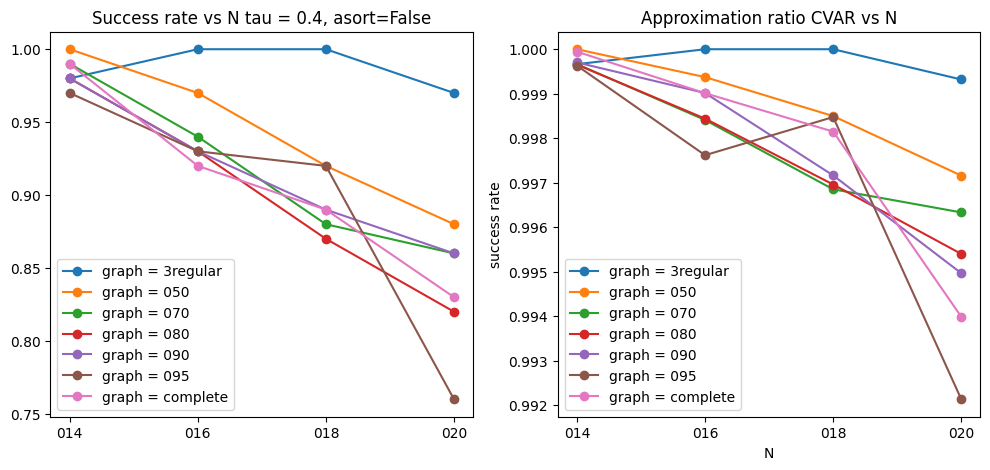

In [6]:
num_variables_list = [str(num).zfill(3) for num in range(14,22, 2)] 
graph_type_list = [ '3regular', '050', '070', '080', '090', '095','complete']

r_list = range(100)
tau_list =[0.4] # [0.3, 0.4]
alpha_list = [0.01]
layer = 1
shots = None
tot_steps = range(5)
if_adsorting = False

num_opt_list = [1,2,3]
color_list = ["green", "blue", "red"]
f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

for graph in graph_type_list:

    dir_0 = './data_iter_adap_sorting' + '/graph_{}/shots_{}'\
                            .format(graph,  shots)
    
    sr_array = np.zeros((len(num_opt_list), len(num_variables_list)))
    ar_array = np.zeros(len(num_variables_list))

    for n_qubits_i, num_variables in enumerate(num_variables_list):
        n_qubits = int(num_variables)

        N = n_qubits
        
        if graph == 'complete':
            # pairs_all = list(itertools.chain.from_iterable(partition_N(n_qubits)))
            # num_pairs = len(pairs_all)
            # num_params = (n_qubits + 2*num_pairs) * layer
            # print(num_pairs, num_params)
            num_params = int(2*(N-1)*N/2 + N)
        elif graph == '3regular':
            num_params= int(2*(3*N)/2 + N)
        else:
            density = float(f"0.{int(graph)}")
            num_params = 2*round((N-1)*N*density/2) +N

        for alpha in alpha_list:

            for taui, tau in enumerate(tau_list):
                print("\ntau = ", tau, "alpha = ", alpha, "qubits = ", N, "parameters =", num_params)

                dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}'\
                                    .format(num_variables, num_params, layer, alpha)
                
                for r in r_list:
                    # filename = f"./data_sorting/ansatz_type_structure_like_qubo_YZ_2/shots_None/layer_1/alpha_{alpha}/initial_warm_start_measure/r_{r}/tau_{tau}_random.pkl"
                    
                    file_dir_name = dir_name + '/r_{}'\
                                .format(r)
                    
                    filename = file_dir_name + '/ifadsorting_{}_tau_{}.pkl'\
                                                            .format(if_adsorting,tau)
                    with open(filename, 'rb') as f:
                        data = pickle.load(f)

                    params_list = data["params_list"]
                    if len(params_list) != round(num_params*2):
                        print("error N, r = ", r, len(params_list))
                        
                    steps_exp_poss_dict = data["steps_exp_poss_dict"]
                    steps_cvar_dict = data["steps_cvar_dict"]
                    steps_entropy_dict = data["steps_entropy_dict"]
                    
                    final_exp_poss = steps_exp_poss_dict[f"step_{len(tot_steps)-1}"]["l_1"]
                    poss_list = list(final_exp_poss.values())
                    if poss_list[0] > alpha:
                        sr_array[0, n_qubits_i] += 1/len(r_list)
                    if sum(poss_list[:2]) > alpha:
                        sr_array[1, n_qubits_i] += 1/len(r_list)
                    if sum(poss_list[:3]) > alpha:
                        sr_array[2, n_qubits_i] += 1/len(r_list)

                    exp_opt = list(final_exp_poss.keys())[0]
                    cvar = steps_cvar_dict[f"step_{len(tot_steps)-1}"]
                    ar_array[n_qubits_i] += (cvar/exp_opt) / len(r_list)

    # print("sr_array = ", sr_array)
    ax1.plot(num_variables_list, sr_array[0], "o-", label=f"graph = {graph}")
    # ax1.plot(tau_list, sr_array[1], "o--",label=f"alpha = {alpha}, num_opt = 2")
    # ax1.plot(tau_list, sr_array[2], "o:",label=f"alpha = {alpha}, num_opt = 3")

    ax2.plot(num_variables_list, ar_array, "o-", label=f"graph = {graph}")
    # print("ar_array = ", ar_array)

    ax1.set_title(f'Success rate vs N tau = {tau}, asort={if_adsorting}')
    ax2.set_title('Approximation ratio CVAR vs N')

    ax1.legend()
plt.legend()
plt.xlabel("N")
plt.ylabel("success rate")
plt.show()



tau =  0.4 alpha =  0.01 qubits =  14 parameters = 56
error N, r =  0 56
error N, r =  1 56
error N, r =  2 56
error N, r =  3 56
error N, r =  4 56
error N, r =  5 56
error N, r =  6 56
error N, r =  7 56
error N, r =  8 56
error N, r =  9 56
error N, r =  10 56
error N, r =  11 56
error N, r =  12 56
error N, r =  13 56
error N, r =  14 56
error N, r =  15 56
error N, r =  16 56
error N, r =  17 56
error N, r =  18 56
error N, r =  19 56
error N, r =  20 56
error N, r =  21 56
error N, r =  22 56
error N, r =  23 56
error N, r =  24 56
error N, r =  25 56
error N, r =  26 56
error N, r =  27 56
error N, r =  28 56
error N, r =  29 56
error N, r =  30 56
error N, r =  31 56
error N, r =  32 56
error N, r =  33 56
error N, r =  34 56
error N, r =  35 56
error N, r =  36 56
error N, r =  37 56
error N, r =  38 56
error N, r =  39 56
error N, r =  40 56
error N, r =  41 56
error N, r =  42 56
error N, r =  43 56
error N, r =  44 56
error N, r =  45 56
error N, r =  46 56
error N, r =  4

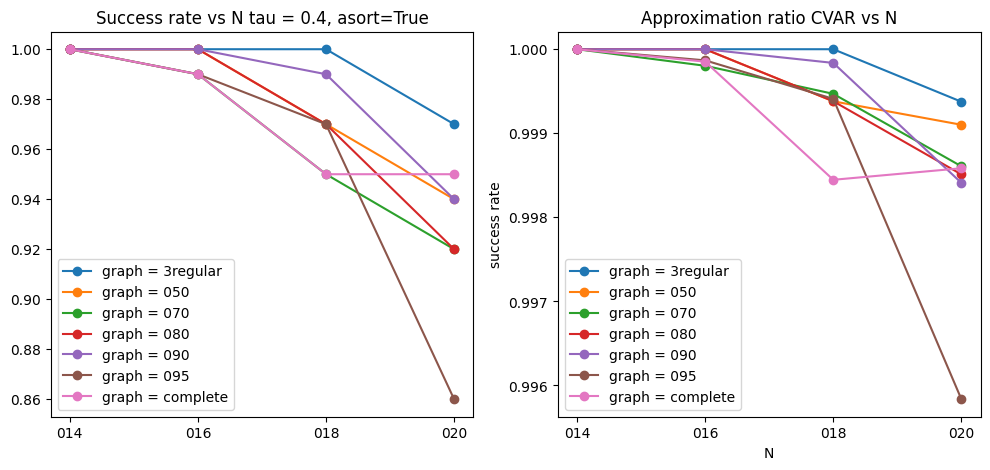

In [7]:
num_variables_list = [str(num).zfill(3) for num in range(14,22, 2)] 
graph_type_list = [ '3regular', '050', '070', '080', '090', '095','complete']

r_list = range(100)
tau_list =[0.4] # [0.3, 0.4]
alpha_list = [0.01]
layer = 1
shots = None
tot_steps = range(5)
if_adsorting = True

num_opt_list = [1,2,3]
color_list = ["green", "blue", "red"]
f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

for graph in graph_type_list:

    dir_0 = './data_iter_adap_sorting' + '/graph_{}/shots_{}'\
                            .format(graph,  shots)
    
    sr_array = np.zeros((len(num_opt_list), len(num_variables_list)))
    ar_array = np.zeros(len(num_variables_list))

    for n_qubits_i, num_variables in enumerate(num_variables_list):
        n_qubits = int(num_variables)

        N = n_qubits
        
        if graph == 'complete':
            # pairs_all = list(itertools.chain.from_iterable(partition_N(n_qubits)))
            # num_pairs = len(pairs_all)
            # num_params = (n_qubits + 2*num_pairs) * layer
            # print(num_pairs, num_params)
            num_params = int(2*(N-1)*N/2 + N)
        elif graph == '3regular':
            num_params= int(2*(3*N)/2 + N)
        else:
            density = float(f"0.{int(graph)}")
            num_params = 2*round((N-1)*N*density/2) +N

        for alpha in alpha_list:

            for taui, tau in enumerate(tau_list):
                print("\ntau = ", tau, "alpha = ", alpha, "qubits = ", N, "parameters =", num_params)

                dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}'\
                                    .format(num_variables, num_params, layer, alpha)
                
                for r in r_list:
                    # filename = f"./data_sorting/ansatz_type_structure_like_qubo_YZ_2/shots_None/layer_1/alpha_{alpha}/initial_warm_start_measure/r_{r}/tau_{tau}_random.pkl"
                    
                    file_dir_name = dir_name + '/r_{}'\
                                .format(r)
                    
                    filename = file_dir_name + '/ifadsorting_{}_tau_{}.pkl'\
                                                            .format(if_adsorting,tau)
                    with open(filename, 'rb') as f:
                        data = pickle.load(f)

                    params_list = data["params_list"]
                    if len(params_list) != round(num_params*2):
                        print("error N, r = ", r, len(params_list))
                        
                    steps_exp_poss_dict = data["steps_exp_poss_dict"]
                    steps_cvar_dict = data["steps_cvar_dict"]
                    steps_entropy_dict = data["steps_entropy_dict"]
                    
                    final_exp_poss = steps_exp_poss_dict[f"step_{len(tot_steps)-1}"]["l_1"]
                    poss_list = list(final_exp_poss.values())
                    if poss_list[0] > alpha:
                        sr_array[0, n_qubits_i] += 1/len(r_list)
                    if sum(poss_list[:2]) > alpha:
                        sr_array[1, n_qubits_i] += 1/len(r_list)
                    if sum(poss_list[:3]) > alpha:
                        sr_array[2, n_qubits_i] += 1/len(r_list)

                    exp_opt = list(final_exp_poss.keys())[0]
                    cvar = steps_cvar_dict[f"step_{len(tot_steps)-1}"]
                    ar_array[n_qubits_i] += (cvar/exp_opt) / len(r_list)

    # print("sr_array = ", sr_array)
    ax1.plot(num_variables_list, sr_array[0], "o-", label=f"graph = {graph}")
    # ax1.plot(tau_list, sr_array[1], "o--",label=f"alpha = {alpha}, num_opt = 2")
    # ax1.plot(tau_list, sr_array[2], "o:",label=f"alpha = {alpha}, num_opt = 3")

    ax2.plot(num_variables_list, ar_array, "o-", label=f"graph = {graph}")
    # print("ar_array = ", ar_array)

    ax1.set_title(f'Success rate vs N tau = {tau}, asort={if_adsorting}')
    ax2.set_title('Approximation ratio CVAR vs N')

    ax1.legend()
plt.legend()
plt.xlabel("N")
plt.ylabel("success rate")
plt.show()


tau =  0.3 alpha =  0.01 qubits =  20 parameters = 400
error N, r =  0 400
error N, r =  1 400
error N, r =  2 400
error N, r =  3 400
error N, r =  4 400
error N, r =  5 400
error N, r =  6 400
error N, r =  7 400
error N, r =  8 400
error N, r =  9 400
error N, r =  10 400
error N, r =  11 400
error N, r =  12 400
error N, r =  13 400
error N, r =  14 400
error N, r =  15 400
error N, r =  16 400
error N, r =  17 400
error N, r =  18 400
error N, r =  19 400
error N, r =  20 400
error N, r =  21 400
error N, r =  22 400
error N, r =  23 400
error N, r =  24 400
error N, r =  25 400
error N, r =  26 400
error N, r =  27 400
error N, r =  28 400
error N, r =  29 400
error N, r =  30 400
error N, r =  31 400
error N, r =  32 400
error N, r =  33 400
error N, r =  34 400
error N, r =  35 400
error N, r =  36 400
error N, r =  37 400
error N, r =  38 400
error N, r =  39 400
error N, r =  40 400
error N, r =  41 400
error N, r =  42 400
error N, r =  43 400
error N, r =  44 400
error N, 

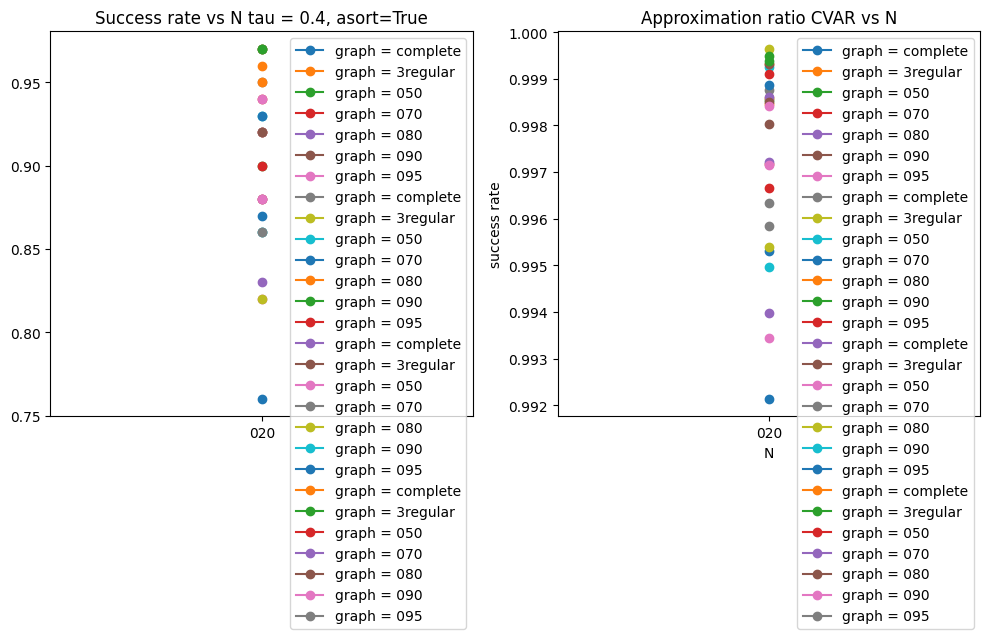

In [73]:
num_variables_list = [str(num).zfill(3) for num in range(20,22, 2)] 
graph_type_list = ['complete', '3regular', '050', '070', '080', '090', '095']

r_list = range(100)
tau_list = [0.3, 0.4]
alpha_list = [0.01]
layer = 1
shots = None
tot_steps = range(5)
if_adsorting_list = [False,True]

num_opt_list = [1,2,3]
color_list = ["green", "blue", "red"]

f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

for taui, tau in enumerate(tau_list):
     
    for if_adsorting in if_adsorting_list:

        ssr = []
        sar = []

        for graph in graph_type_list:
            
            sr_array = np.zeros((len(num_opt_list), len(num_variables_list)))
            ar_array = np.zeros(len(num_variables_list))

            for n_qubits_i, num_variables in enumerate(num_variables_list):
                n_qubits = int(num_variables)

                N = n_qubits

                dir_0 = './data_iter_adap_sorting' + '/graph_{}/shots_{}'\
                            .format(graph,  shots)
                
                if graph == 'complete':
                    num_params = int(2*(N-1)*N/2 + N)
                elif graph == '3regular':
                    num_params= int(2*(3*N)/2 + N)
                else:
                    density = float(f"0.{int(graph)}")
                    num_params = 2*round((N-1)*N*density/2) +N

                for alpha in alpha_list:

                    print("\ntau = ", tau, "alpha = ", alpha, "qubits = ", N, "parameters =", num_params)

                    dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}'\
                                        .format(num_variables, num_params, layer, alpha)
                    
                    for r in r_list:
                        
                        file_dir_name = dir_name + '/r_{}'\
                                    .format(r)
                        
                        filename = file_dir_name + '/ifadsorting_{}_tau_{}.pkl'\
                                                                .format(if_adsorting,tau)
                        with open(filename, 'rb') as f:
                            data = pickle.load(f)

                        params_list = data["params_list"]
                        if len(params_list) != round(num_params*2):
                            print("error N, r = ", r, len(params_list))
                            
                        steps_exp_poss_dict = data["steps_exp_poss_dict"]
                        steps_cvar_dict = data["steps_cvar_dict"]
                        steps_entropy_dict = data["steps_entropy_dict"]
                        
                        final_exp_poss = steps_exp_poss_dict[f"step_{len(tot_steps)-1}"]["l_1"]
                        poss_list = list(final_exp_poss.values())
                        if poss_list[0] > alpha:
                            sr_array[0, n_qubits_i] += 1/len(r_list)
                        if sum(poss_list[:2]) > alpha:
                            sr_array[1, n_qubits_i] += 1/len(r_list)
                        if sum(poss_list[:3]) > alpha:
                            sr_array[2, n_qubits_i] += 1/len(r_list)

                        exp_opt = list(final_exp_poss.keys())[0]
                        cvar = steps_cvar_dict[f"step_{len(tot_steps)-1}"]
                        ar_array[n_qubits_i] += (cvar/exp_opt) / len(r_list)

            # print("sr_array = ", sr_array)
            ax1.plot(num_variables_list, sr_array[0], "o-", label=f"graph = {graph}")
            # ax1.plot(tau_list, sr_array[1], "o--",label=f"alpha = {alpha}, num_opt = 2")
            # ax1.plot(tau_list, sr_array[2], "o:",label=f"alpha = {alpha}, num_opt = 3")

            ax2.plot(num_variables_list, ar_array, "o-", label=f"graph = {graph}")
            # print("ar_array = ", ar_array)

            ax1.set_title(f'Success rate vs N tau = {tau}, asort={if_adsorting}')
            ax2.set_title('Approximation ratio CVAR vs N')

            ax1.legend()
        
        # ssr.append(sr)
        # sar.append(ar)
    
plt.legend()
plt.xlabel("N")
plt.ylabel("success rate")
plt.show()

ITE ADAP STEPS


 step =  0 tau =  0.4 alpha =  0.01 N = 20

 step =  1 tau =  0.4 alpha =  0.01 N = 20

 step =  2 tau =  0.4 alpha =  0.01 N = 20

 step =  3 tau =  0.4 alpha =  0.01 N = 20

 step =  4 tau =  0.4 alpha =  0.01 N = 20
sr_array =  [[0.04 0.95 0.96 0.97 0.97]
 [0.06 0.95 0.96 0.97 0.97]
 [0.   0.   0.   0.   0.  ]]
ar_array =  [[0.97691484 0.99938476 0.99937154 0.99932395 0.99932003]
 [0.98223862 0.99947155 0.9994287  0.99937793 0.99937531]
 [0.         0.         0.         0.         0.        ]]

 step =  0 tau =  0.4 alpha =  0.01 N = 20

 step =  1 tau =  0.4 alpha =  0.01 N = 20

 step =  2 tau =  0.4 alpha =  0.01 N = 20

 step =  3 tau =  0.4 alpha =  0.01 N = 20

 step =  4 tau =  0.4 alpha =  0.01 N = 20
sr_array =  [[0.08 0.84 0.87 0.88 0.88]
 [0.25 0.91 0.93 0.94 0.94]
 [0.   0.   0.   0.   0.  ]]
ar_array =  [[0.98189706 0.99646095 0.99689928 0.99716052 0.99716032]
 [0.99073765 0.99894941 0.99900815 0.99911224 0.99910137]
 [0.         0.         0.         0.         0.   

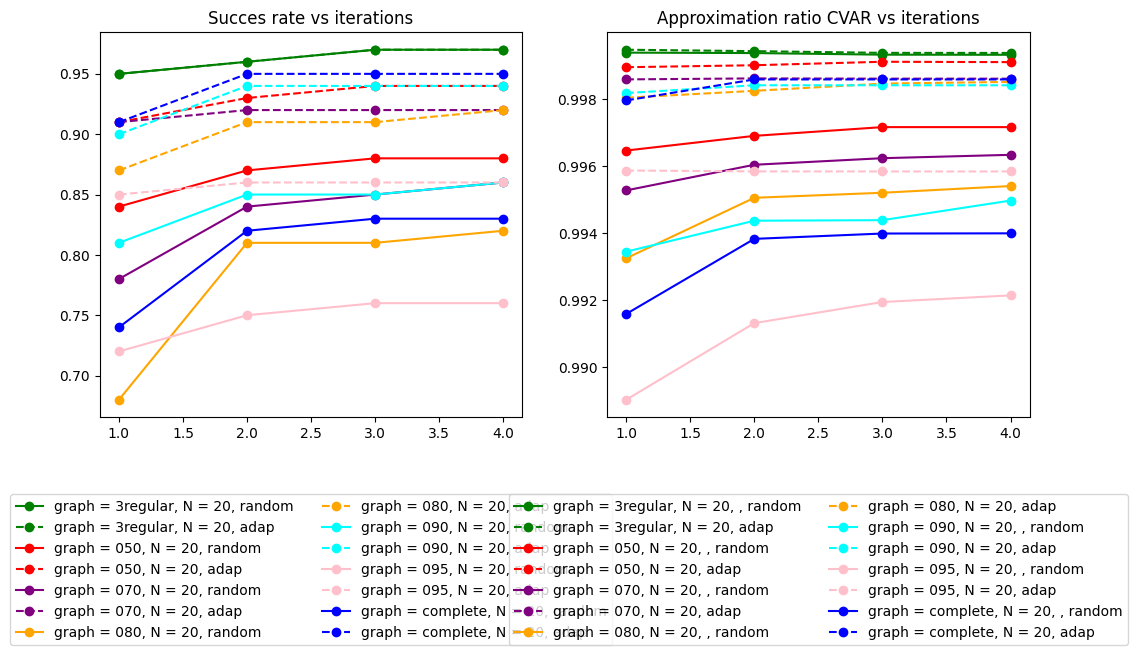

<Figure size 1200x800 with 0 Axes>

In [9]:
num_variables_list = [str(num).zfill(3) for num in range(20,22, 2)] 
graph_type_list = ['3regular', '050', '070', '080', '090', '095', 'complete']
# graph_type_list = ['3regular', '050', '070', '080', '090', 'complete']

r_list = range(100)
tau_list = [0.3, 0.4]
alpha_list = [0.01]
layer = 1
shots = None
tot_steps = range(5)
if_adsorting_list = [False,True]

tot_steps = range(5)

num_opt_list = [1,2,3]
color_list = ["green", "blue", "red"]

f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

color_map = {
    "complete": "blue",
    "3regular": "green",
    "050": "red",
    "070": "purple",
    "080": "orange",
    "090": "cyan",
    "095": "pink",
}

tau = 0.4
dir_0_adap =  './data_iter_adap_sorting' 

# for graph in graph_type_list: 
#     for num_variables in num_variables_list:
for num_variables in num_variables_list:
    for graph in graph_type_list: 
        
        tot_steps = range(5) 

        sr_array = np.zeros((len(num_opt_list), len(tot_steps)))
        ar_array = np.zeros((len(num_opt_list), len(tot_steps)))


        n_qubits = int(num_variables)

        N = n_qubits
        
        dir_0 = './data_iter_adap_sorting' + '/graph_{}/shots_{}'\
                    .format(graph,  shots)
        
        if graph == 'complete':
            num_params = int(2*(N-1)*N/2 + N)
        elif graph == '3regular':
            num_params= int(2*(3*N)/2 + N)
        else:
            density = float(f"0.{int(graph)}")
            num_params = 2*round((N-1)*N*density/2) +N

        for step in tot_steps:
            print("\n step = ", step, "tau = ", tau, "alpha = ", alpha, "N =", N)
            
            dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}'\
                                            .format(num_variables, num_params, layer, alpha)
            
            for r in r_list:
                # filename = f"./data_sorting/ansatz_type_structure_like_qubo_YZ_2/shots_None/layer_1/alpha_{alpha}/initial_warm_start_measure/r_{r}/tau_{tau}_random.pkl"

                file_dir_name = dir_name + '/r_{}'\
                                    .format(r)
                
                filename = file_dir_name + '/ifadsorting_{}_tau_{}.pkl'\
                                            .format(False,tau)
                                
                with open(filename, 'rb') as f:
                    data = pickle.load(f)

                filename_adap =  file_dir_name + '/ifadsorting_{}_tau_{}.pkl'\
                                            .format(True,tau)
                                
                with open(filename_adap, 'rb') as f:
                    data_adap = pickle.load(f)

                params_list = data["params_list"]

                params_list = data_adap["params_list"]

                steps_exp_poss_dict = data["steps_exp_poss_dict"]
                steps_cvar_dict = data["steps_cvar_dict"]
                final_exp_poss = steps_exp_poss_dict[f"step_{step}"]["l_1"]  
                poss_list = list(final_exp_poss.values())

                steps_exp_poss_dict_adap = data_adap["steps_exp_poss_dict"]
                steps_cvar_dict_adap = data_adap["steps_cvar_dict"]
                final_exp_poss_adap = steps_exp_poss_dict_adap[f"step_{step}"]["l_1"]
                poss_list_adap = list(final_exp_poss_adap.values())


                if poss_list[0] > alpha:
                    sr_array[0, step] += 1/len(r_list)
                if poss_list_adap[0] > alpha:
                    sr_array[1, step] += 1/len(r_list)

                # if sum(poss_list[:3]) > alpha:
                #     sr_array[2, step] += 1/len(r_list)

                exp_opt = list(final_exp_poss.keys())[0]
                cvar = steps_cvar_dict[f"step_{step}"]

                ar_array[0,step] += (cvar/exp_opt) / len(r_list)

                exp_opt = list(final_exp_poss_adap.keys())[0]
                cvar = steps_cvar_dict_adap[f"step_{step}"]

                ar_array[1,step] += (cvar/exp_opt) / len(r_list)

        tot_steps = range(1,5)
        
        color = color_map.get(graph, "black")

        print("sr_array = ", sr_array)
        ax1.plot(tot_steps, sr_array[0][1:], "o-", color=color, label=f"graph = {graph}, N = {N}, random")
        ax1.plot(tot_steps, sr_array[1][1:], "o--",color=color, label=f"graph = {graph}, N = {N}, adap")
        # ax1.plot(tot_steps, sr_array[2], "o:",label=f"alpha = {alpha}, num_opt = 3")

        ax2.plot(tot_steps, ar_array[0][1:], "o-", color=color, label=f"graph = {graph}, N = {N}, , random")
        ax2.plot(tot_steps, ar_array[1][1:], "o--", color=color, label=f"graph = {graph}, N = {N}, adap")

        ax1.set_title('Succes rate vs iterations')
        ax2.set_title('Approximation ratio CVAR vs iterations')

        ax1.legend()
        print("ar_array = ", ar_array)
# plt.legend()
f = plt.figure(figsize=(12, 8))
ax1.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=2, borderaxespad=0.)
ax2.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=2, borderaxespad=0.)
plt.tight_layout()
# plt.xlabel("iterations")
# plt.ylabel("success rate")
plt.show()


 step =  0 tau =  0.3 alpha =  0.01 N = 20

 step =  1 tau =  0.3 alpha =  0.01 N = 20

 step =  2 tau =  0.3 alpha =  0.01 N = 20

 step =  3 tau =  0.3 alpha =  0.01 N = 20

 step =  4 tau =  0.3 alpha =  0.01 N = 20
sr_array =  [[0.   0.92 0.95 0.96 0.96]
 [0.   0.92 0.95 0.97 0.97]
 [0.   0.   0.   0.   0.  ]]
ar_array =  [[0.94686669 0.9991652  0.99930998 0.99931078 0.99931078]
 [0.95104507 0.99923826 0.99946148 0.99964102 0.99964102]
 [0.         0.         0.         0.         0.        ]]

 step =  0 tau =  0.3 alpha =  0.01 N = 20

 step =  1 tau =  0.3 alpha =  0.01 N = 20

 step =  2 tau =  0.3 alpha =  0.01 N = 20

 step =  3 tau =  0.3 alpha =  0.01 N = 20

 step =  4 tau =  0.3 alpha =  0.01 N = 20
sr_array =  [[0.02 0.8  0.87 0.9  0.9 ]
 [0.06 0.89 0.92 0.93 0.93]
 [0.   0.   0.   0.   0.  ]]
ar_array =  [[0.9735627  0.99666642 0.99829411 0.99854146 0.99854114]
 [0.98119742 0.99846972 0.99892432 0.9992538  0.9992538 ]
 [0.         0.         0.         0.         0.   

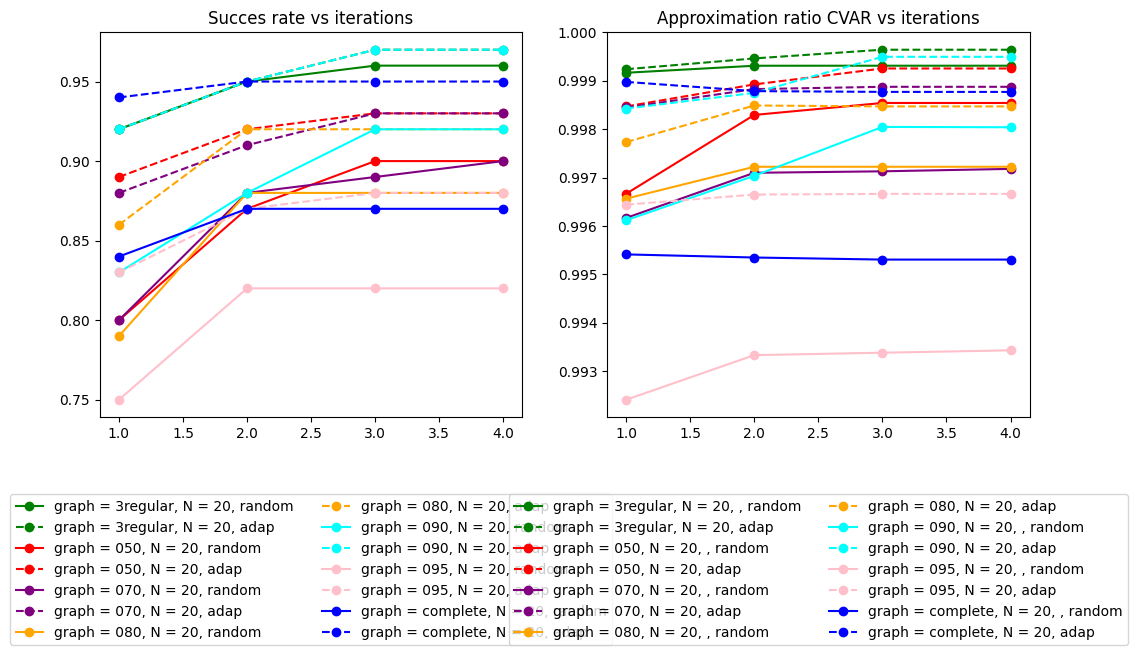

<Figure size 1200x800 with 0 Axes>

In [10]:
num_variables_list = [str(num).zfill(3) for num in range(20,22, 2)] 
graph_type_list = ['3regular', '050', '070', '080', '090', '095', 'complete']
# graph_type_list = ['3regular', '050', '070', '080', '090', 'complete']

r_list = range(100)
tau_list = [0.3, 0.4]
alpha_list = [0.01]
layer = 1
shots = None
tot_steps = range(5)
if_adsorting_list = [False,True]

tot_steps = range(5)

num_opt_list = [1,2,3]
color_list = ["green", "blue", "red"]

f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

color_map = {
    "complete": "blue",
    "3regular": "green",
    "050": "red",
    "070": "purple",
    "080": "orange",
    "090": "cyan",
    "095": "pink",
}

tau = 0.3
dir_0_adap =  './data_iter_adap_sorting' 

# for graph in graph_type_list: 
#     for num_variables in num_variables_list:
for num_variables in num_variables_list:
    for graph in graph_type_list: 
        
        tot_steps = range(5) 

        sr_array = np.zeros((len(num_opt_list), len(tot_steps)))
        ar_array = np.zeros((len(num_opt_list), len(tot_steps)))


        n_qubits = int(num_variables)

        N = n_qubits
        
        dir_0 = './data_iter_adap_sorting' + '/graph_{}/shots_{}'\
                    .format(graph,  shots)
        
        if graph == 'complete':
            num_params = int(2*(N-1)*N/2 + N)
        elif graph == '3regular':
            num_params= int(2*(3*N)/2 + N)
        else:
            density = float(f"0.{int(graph)}")
            num_params = 2*round((N-1)*N*density/2) +N

        for step in tot_steps:
            print("\n step = ", step, "tau = ", tau, "alpha = ", alpha, "N =", N)
            
            dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}'\
                                            .format(num_variables, num_params, layer, alpha)
            
            for r in r_list:
                # filename = f"./data_sorting/ansatz_type_structure_like_qubo_YZ_2/shots_None/layer_1/alpha_{alpha}/initial_warm_start_measure/r_{r}/tau_{tau}_random.pkl"

                file_dir_name = dir_name + '/r_{}'\
                                    .format(r)
                
                filename = file_dir_name + '/ifadsorting_{}_tau_{}.pkl'\
                                            .format(False,tau)
                                
                with open(filename, 'rb') as f:
                    data = pickle.load(f)

                filename_adap =  file_dir_name + '/ifadsorting_{}_tau_{}.pkl'\
                                            .format(True,tau)
                                
                with open(filename_adap, 'rb') as f:
                    data_adap = pickle.load(f)

                params_list = data["params_list"]

                params_list = data_adap["params_list"]

                steps_exp_poss_dict = data["steps_exp_poss_dict"]
                steps_cvar_dict = data["steps_cvar_dict"]
                final_exp_poss = steps_exp_poss_dict[f"step_{step}"]["l_1"]  
                poss_list = list(final_exp_poss.values())

                steps_exp_poss_dict_adap = data_adap["steps_exp_poss_dict"]
                steps_cvar_dict_adap = data_adap["steps_cvar_dict"]
                final_exp_poss_adap = steps_exp_poss_dict_adap[f"step_{step}"]["l_1"]
                poss_list_adap = list(final_exp_poss_adap.values())


                if poss_list[0] > alpha:
                    sr_array[0, step] += 1/len(r_list)
                if poss_list_adap[0] > alpha:
                    sr_array[1, step] += 1/len(r_list)

                # if sum(poss_list[:3]) > alpha:
                #     sr_array[2, step] += 1/len(r_list)

                exp_opt = list(final_exp_poss.keys())[0]
                cvar = steps_cvar_dict[f"step_{step}"]

                ar_array[0,step] += (cvar/exp_opt) / len(r_list)

                exp_opt = list(final_exp_poss_adap.keys())[0]
                cvar = steps_cvar_dict_adap[f"step_{step}"]

                ar_array[1,step] += (cvar/exp_opt) / len(r_list)

        tot_steps = range(1,5)
        
        color = color_map.get(graph, "black")

        print("sr_array = ", sr_array)
        ax1.plot(tot_steps, sr_array[0][1:], "o-", color=color, label=f"graph = {graph}, N = {N}, random")
        ax1.plot(tot_steps, sr_array[1][1:], "o--",color=color, label=f"graph = {graph}, N = {N}, adap")
        # ax1.plot(tot_steps, sr_array[2], "o:",label=f"alpha = {alpha}, num_opt = 3")

        ax2.plot(tot_steps, ar_array[0][1:], "o-", color=color, label=f"graph = {graph}, N = {N}, , random")
        ax2.plot(tot_steps, ar_array[1][1:], "o--", color=color, label=f"graph = {graph}, N = {N}, adap")

        ax1.set_title('Succes rate vs iterations')
        ax2.set_title('Approximation ratio CVAR vs iterations')

        ax1.legend()
        print("ar_array = ", ar_array)
# plt.legend()
f = plt.figure(figsize=(12, 8))
ax1.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=2, borderaxespad=0.)
ax2.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=2, borderaxespad=0.)
plt.tight_layout()
# plt.xlabel("iterations")
# plt.ylabel("success rate")
plt.show()


 step =  0 tau =  0.3 alpha =  0.01 N = 20

 step =  1 tau =  0.3 alpha =  0.01 N = 20

 step =  2 tau =  0.3 alpha =  0.01 N = 20

 step =  3 tau =  0.3 alpha =  0.01 N = 20

 step =  4 tau =  0.3 alpha =  0.01 N = 20
sr_array =  [[0.   0.92 0.95 0.97 0.97]
 [0.06 0.95 0.96 0.97 0.97]
 [0.   0.   0.   0.   0.  ]]
ar_array =  [[0.95104507 0.99923826 0.99946148 0.99964102 0.99964102]
 [0.98223862 0.99947155 0.9994287  0.99937793 0.99937531]
 [0.         0.         0.         0.         0.        ]]

 step =  0 tau =  0.3 alpha =  0.01 N = 20

 step =  1 tau =  0.3 alpha =  0.01 N = 20

 step =  2 tau =  0.3 alpha =  0.01 N = 20

 step =  3 tau =  0.3 alpha =  0.01 N = 20

 step =  4 tau =  0.3 alpha =  0.01 N = 20
sr_array =  [[0.06 0.89 0.92 0.93 0.93]
 [0.25 0.91 0.93 0.94 0.94]
 [0.   0.   0.   0.   0.  ]]
ar_array =  [[0.98119742 0.99846972 0.99892432 0.9992538  0.9992538 ]
 [0.99073765 0.99894941 0.99900815 0.99911224 0.99910137]
 [0.         0.         0.         0.         0.   

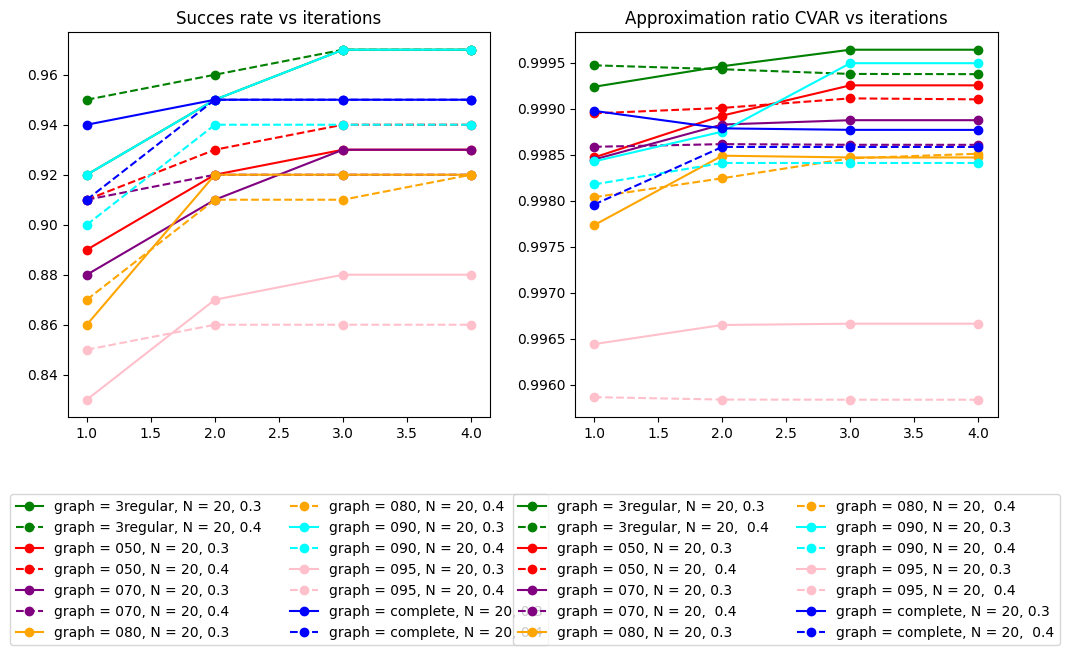

<Figure size 1200x800 with 0 Axes>

In [11]:
num_variables_list = [str(num).zfill(3) for num in range(20,22, 2)] 
graph_type_list = ['3regular', '050', '070', '080', '090', '095', 'complete']
# graph_type_list = ['3regular', '050', '070', '080', '090', 'complete']

r_list = range(100)
tau_list = [0.3, 0.4]
alpha_list = [0.01]
layer = 1
shots = None
tot_steps = range(5)
if_adsorting_list = [False,True]

tot_steps = range(5)

num_opt_list = [1,2,3]
color_list = ["green", "blue", "red"]

f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

color_map = {
    "complete": "blue",
    "3regular": "green",
    "050": "red",
    "070": "purple",
    "080": "orange",
    "090": "cyan",
    "095": "pink",
}


dir_0_adap =  './data_iter_adap_sorting' 

# for graph in graph_type_list: 
#     for num_variables in num_variables_list:
for num_variables in num_variables_list:
    for graph in graph_type_list: 
        
        tot_steps = range(5) 

        sr_array = np.zeros((len(num_opt_list), len(tot_steps)))
        ar_array = np.zeros((len(num_opt_list), len(tot_steps)))


        n_qubits = int(num_variables)

        N = n_qubits
        
        dir_0 = './data_iter_adap_sorting' + '/graph_{}/shots_{}'\
                    .format(graph,  shots)
        
        if graph == 'complete':
            num_params = int(2*(N-1)*N/2 + N)
        elif graph == '3regular':
            num_params= int(2*(3*N)/2 + N)
        else:
            density = float(f"0.{int(graph)}")
            num_params = 2*round((N-1)*N*density/2) +N

        for step in tot_steps:
            print("\n step = ", step, "tau = ", tau, "alpha = ", alpha, "N =", N)
            
            dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}'\
                                            .format(num_variables, num_params, layer, alpha)
            
            for r in r_list:
                # filename = f"./data_sorting/ansatz_type_structure_like_qubo_YZ_2/shots_None/layer_1/alpha_{alpha}/initial_warm_start_measure/r_{r}/tau_{tau}_random.pkl"

                file_dir_name = dir_name + '/r_{}'\
                                    .format(r)
                
                filename = file_dir_name + '/ifadsorting_{}_tau_{}.pkl'\
                                            .format(True,tau_list[0])
                                
                with open(filename, 'rb') as f:
                    data = pickle.load(f)

                filename_adap =  file_dir_name + '/ifadsorting_{}_tau_{}.pkl'\
                                            .format(True,tau_list[1])
                                
                with open(filename_adap, 'rb') as f:
                    data_adap = pickle.load(f)

                params_list = data["params_list"]

                params_list = data_adap["params_list"]

                steps_exp_poss_dict = data["steps_exp_poss_dict"]
                steps_cvar_dict = data["steps_cvar_dict"]
                final_exp_poss = steps_exp_poss_dict[f"step_{step}"]["l_1"]  
                poss_list = list(final_exp_poss.values())

                steps_exp_poss_dict_adap = data_adap["steps_exp_poss_dict"]
                steps_cvar_dict_adap = data_adap["steps_cvar_dict"]
                final_exp_poss_adap = steps_exp_poss_dict_adap[f"step_{step}"]["l_1"]
                poss_list_adap = list(final_exp_poss_adap.values())


                if poss_list[0] > alpha:
                    sr_array[0, step] += 1/len(r_list)
                if poss_list_adap[0] > alpha:
                    sr_array[1, step] += 1/len(r_list)

                # if sum(poss_list[:3]) > alpha:
                #     sr_array[2, step] += 1/len(r_list)

                exp_opt = list(final_exp_poss.keys())[0]
                cvar = steps_cvar_dict[f"step_{step}"]

                ar_array[0,step] += (cvar/exp_opt) / len(r_list)

                exp_opt = list(final_exp_poss_adap.keys())[0]
                cvar = steps_cvar_dict_adap[f"step_{step}"]

                ar_array[1,step] += (cvar/exp_opt) / len(r_list)

        tot_steps = range(1,5)
        
        color = color_map.get(graph, "black")

        print("sr_array = ", sr_array)
        ax1.plot(tot_steps, sr_array[0][1:], "o-", color=color, label=f"graph = {graph}, N = {N}, 0.3")
        ax1.plot(tot_steps, sr_array[1][1:], "o--",color=color, label=f"graph = {graph}, N = {N}, 0.4")
        # ax1.plot(tot_steps, sr_array[2], "o:",label=f"alpha = {alpha}, num_opt = 3")

        ax2.plot(tot_steps, ar_array[0][1:], "o-", color=color, label=f"graph = {graph}, N = {N}, 0.3")
        ax2.plot(tot_steps, ar_array[1][1:], "o--", color=color, label=f"graph = {graph}, N = {N},  0.4")

        ax1.set_title('Succes rate vs iterations')
        ax2.set_title('Approximation ratio CVAR vs iterations')

        ax1.legend()
        print("ar_array = ", ar_array)
# plt.legend()
f = plt.figure(figsize=(12, 8))
ax1.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=2, borderaxespad=0.)
ax2.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=2, borderaxespad=0.)
plt.tight_layout()
# plt.xlabel("iterations")
# plt.ylabel("success rate")
plt.show()

PLOT PERFORMANCE AGAINST GRAPH DENSITY


tau =  0.3 alpha =  0.01 qubits =  20 parameters = 80

tau =  0.3 alpha =  0.01 qubits =  20 parameters = 210

tau =  0.3 alpha =  0.01 qubits =  20 parameters = 286

tau =  0.3 alpha =  0.01 qubits =  20 parameters = 324

tau =  0.3 alpha =  0.01 qubits =  20 parameters = 362

tau =  0.3 alpha =  0.01 qubits =  20 parameters = 380

tau =  0.3 alpha =  0.01 qubits =  20 parameters = 400

tau =  0.3 alpha =  0.01 qubits =  20 parameters = 80

tau =  0.3 alpha =  0.01 qubits =  20 parameters = 210

tau =  0.3 alpha =  0.01 qubits =  20 parameters = 286

tau =  0.3 alpha =  0.01 qubits =  20 parameters = 324

tau =  0.3 alpha =  0.01 qubits =  20 parameters = 362

tau =  0.3 alpha =  0.01 qubits =  20 parameters = 380

tau =  0.3 alpha =  0.01 qubits =  20 parameters = 400

tau =  0.4 alpha =  0.01 qubits =  20 parameters = 80

tau =  0.4 alpha =  0.01 qubits =  20 parameters = 210

tau =  0.4 alpha =  0.01 qubits =  20 parameters = 286

tau =  0.4 alpha =  0.01 qubits =  20 parameters =

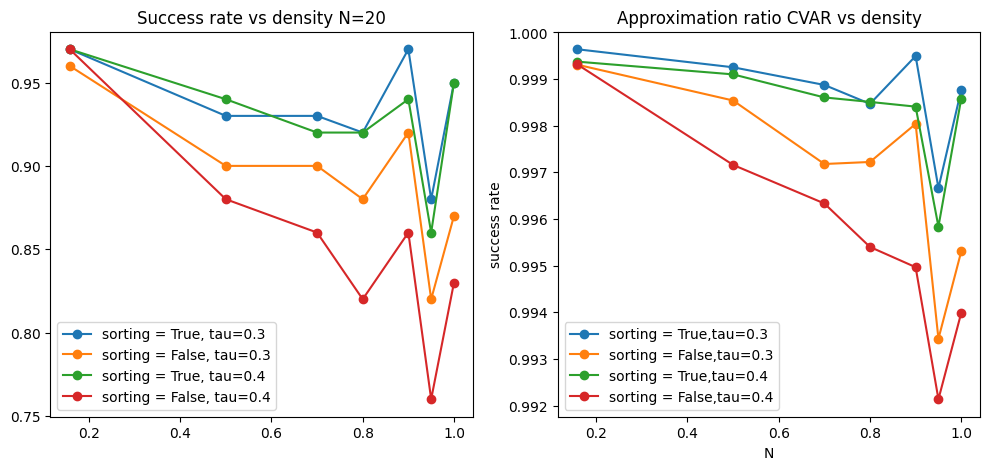

In [26]:
num_variables_list = [str(num).zfill(3) for num in range(20,22, 2)] 
graph_type_list = ['3regular', '050', '070', '080', '090', '095','complete']

r_list = range(100)
tau_list =[0.3,0.4] # [0.3, 0.4]
alpha_list = [0.01]
layer = 1
shots = None
tot_steps = range(5)
if_adsorting = False

num_opt_list = [1,2,3]
color_list = ["green", "blue", "red"]
f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

for taui, tau in enumerate(tau_list):

    for if_adsorting in [True, False]:

        sr_array = np.zeros((len(num_opt_list), len(graph_type_list)))
        ar_array = np.zeros(len(graph_type_list))

        density_list = []

        for igraph, graph in enumerate(graph_type_list):

            dir_0 = './data_iter_adap_sorting' + '/graph_{}/shots_{}'\
                                    .format(graph,  shots)

            for n_qubits_i, num_variables in enumerate(num_variables_list):
                n_qubits = int(num_variables)

                N = n_qubits
                
                if graph == 'complete':
                    # pairs_all = list(itertools.chain.from_iterable(partition_N(n_qubits)))
                    # num_pairs = len(pairs_all)
                    # num_params = (n_qubits + 2*num_pairs) * layer
                    # print(num_pairs, num_params)
                    density =1
                    num_params = int(2*(N-1)*N/2 + N)
                elif graph == '3regular':
                    num_params= int(2*(3*N)/2 + N)
                    density = ((3*N)/2)/((N-1)*N/2 )
                else:
                    density = float(f"0.{int(graph)}")
                    num_params = 2*round((N-1)*N*density/2) +N

                density_list.append(density)

                for alpha in alpha_list:

                    print("\ntau = ", tau, "alpha = ", alpha, "qubits = ", N, "parameters =", num_params)

                    dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}'\
                                        .format(num_variables, num_params, layer, alpha)
                    
                    for r in r_list:
                        # filename = f"./data_sorting/ansatz_type_structure_like_qubo_YZ_2/shots_None/layer_1/alpha_{alpha}/initial_warm_start_measure/r_{r}/tau_{tau}_random.pkl"
                        
                        file_dir_name = dir_name + '/r_{}'\
                                    .format(r)
                        
                        filename = file_dir_name + '/ifadsorting_{}_tau_{}.pkl'\
                                                                .format(if_adsorting,tau)
                        with open(filename, 'rb') as f:
                            data = pickle.load(f)

                        params_list = data["params_list"]
                        if len(params_list) != round(num_params):
                            print("error N, r = ", r, len(params_list))
                            
                        steps_exp_poss_dict = data["steps_exp_poss_dict"]
                        steps_cvar_dict = data["steps_cvar_dict"]
                        steps_entropy_dict = data["steps_entropy_dict"]
                        
                        final_exp_poss = steps_exp_poss_dict[f"step_{len(tot_steps)-1}"]["l_1"]
                        poss_list = list(final_exp_poss.values())
                        if poss_list[0] > alpha:
                            sr_array[0, igraph] += 1/len(r_list)
                        if sum(poss_list[:2]) > alpha:
                            sr_array[1, igraph] += 1/len(r_list)
                        if sum(poss_list[:3]) > alpha:
                            sr_array[2, igraph] += 1/len(r_list)

                        exp_opt = list(final_exp_poss.keys())[0]
                        cvar = steps_cvar_dict[f"step_{len(tot_steps)-1}"]
                        ar_array[igraph] += (cvar/exp_opt) / len(r_list)


        # print("sr_array = ", sr_array)
        ax1.plot(density_list, sr_array[0], "o-", label=f"sorting = {if_adsorting}, tau={tau}")
        # ax1.plot(tau_list, sr_array[1], "o--",label=f"alpha = {alpha}, num_opt = 2")
        # ax1.plot(tau_list, sr_array[2], "o:",label=f"alpha = {alpha}, num_opt = 3")

        ax2.plot(density_list, ar_array, "o-", label=f"sorting = {if_adsorting},tau={tau}")
        # print("ar_array = ", ar_array)

        ax1.set_title(f'Success rate vs density N=20')
        ax2.set_title('Approximation ratio CVAR vs density')

ax1.legend()
plt.legend()
plt.xlabel("N")
plt.ylabel("success rate")
plt.show()


tau =  0.3 alpha =  0.01 qubits =  14 parameters = 56

tau =  0.3 alpha =  0.01 qubits =  16 parameters = 64

tau =  0.3 alpha =  0.01 qubits =  18 parameters = 72

tau =  0.3 alpha =  0.01 qubits =  20 parameters = 80

tau =  0.3 alpha =  0.01 qubits =  14 parameters = 106

tau =  0.3 alpha =  0.01 qubits =  16 parameters = 136

tau =  0.3 alpha =  0.01 qubits =  18 parameters = 170

tau =  0.3 alpha =  0.01 qubits =  20 parameters = 210

tau =  0.3 alpha =  0.01 qubits =  14 parameters = 142

tau =  0.3 alpha =  0.01 qubits =  16 parameters = 184

tau =  0.3 alpha =  0.01 qubits =  18 parameters = 232

tau =  0.3 alpha =  0.01 qubits =  20 parameters = 286

tau =  0.3 alpha =  0.01 qubits =  14 parameters = 160

tau =  0.3 alpha =  0.01 qubits =  16 parameters = 208

tau =  0.3 alpha =  0.01 qubits =  18 parameters = 262

tau =  0.3 alpha =  0.01 qubits =  20 parameters = 324

tau =  0.3 alpha =  0.01 qubits =  14 parameters = 178

tau =  0.3 alpha =  0.01 qubits =  16 parameters = 

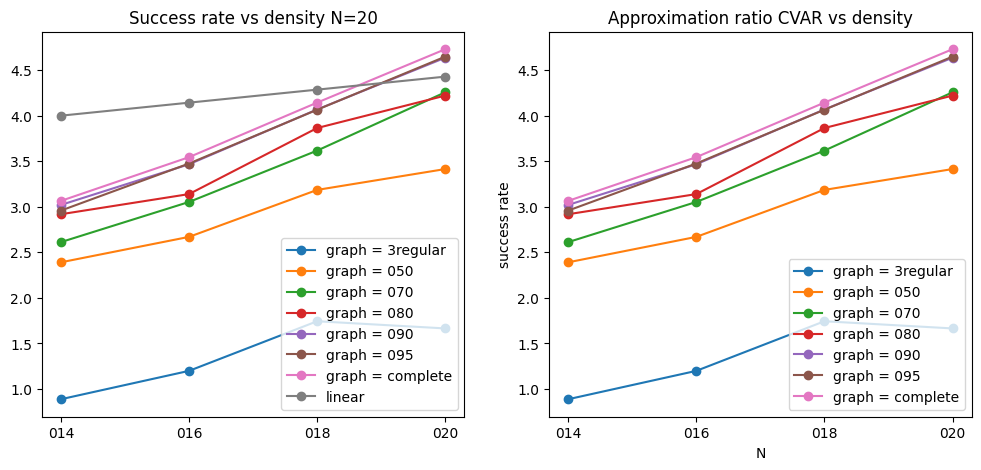

In [63]:
num_variables_list = [str(num).zfill(3) for num in range(14,22, 2)] 
graph_type_list = ['3regular', '050', '070', '080', '090', '095','complete']


r_list = range(100)
tau_list =[0.3] # [0.3, 0.4]
alpha_list = [0.01]
layer = 1
shots = None
tot_steps = range(5)
if_adsorting = False

num_opt_list = [1,2,3]
color_list = ["green", "blue", "red"]
f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

for taui, tau in enumerate(tau_list):

    for if_adsorting in [True]:

        density_list = []

        for igraph, graph in enumerate(graph_type_list):

            dir_0 = './data_iter_adap_sorting' + '/graph_{}/shots_{}'\
                                    .format(graph,  shots)

            ar_array = np.zeros(len(num_variables_list))
            for n_qubits_i, num_variables in enumerate(num_variables_list):
                n_qubits = int(num_variables)

                N = n_qubits
                
                if graph == 'complete':
                    # pairs_all = list(itertools.chain.from_iterable(partition_N(n_qubits)))
                    # num_pairs = len(pairs_all)
                    # num_params = (n_qubits + 2*num_pairs) * layer
                    # print(num_pairs, num_params)
                    density =1
                    num_params = int(2*(N-1)*N/2 + N)
                elif graph == '3regular':
                    num_params= int(2*(3*N)/2 + N)
                    density = ((3*N)/2)/((N-1)*N/2 )
                else:
                    density = float(f"0.{int(graph)}")
                    num_params = 2*round((N-1)*N*density/2) +N

                density_list.append(density)

                for alpha in alpha_list:

                    print("\ntau = ", tau, "alpha = ", alpha, "qubits = ", N, "parameters =", num_params)

                    dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}'\
                                        .format(num_variables, num_params, layer, alpha)
                    
                    max_entropy = 0 

                    for r in r_list:
                        # filename = f"./data_sorting/ansatz_type_structure_like_qubo_YZ_2/shots_None/layer_1/alpha_{alpha}/initial_warm_start_measure/r_{r}/tau_{tau}_random.pkl"
                        
                        file_dir_name = dir_name + '/r_{}'\
                                    .format(r)
                        
                        filename = file_dir_name + '/ifadsorting_{}_tau_{}.pkl'\
                                                                .format(if_adsorting,tau)
                        with open(filename, 'rb') as f:
                            data = pickle.load(f)

                        params_list = data["params_list"]
                        if len(params_list) != round(num_params):
                            print("error N, r = ", r, len(params_list))
                            
                        # steps_exp_poss_dict = data["steps_exp_poss_dict"]
                        # steps_cvar_dict = data["steps_cvar_dict"]
                        steps_entropy_dict = data["steps_entropy_dict"]

                        max_key = max(data["steps_entropy_dict"], key=data["steps_entropy_dict"].get)
                        max_value = data["steps_entropy_dict"][max_key]

                        max_entropy += max_value
                        
                        # final_exp_poss = steps_exp_poss_dict[f"step_{len(tot_steps)-1}"]["l_1"]
                        # poss_list = list(final_exp_poss.values())
                        # if poss_list[0] > alpha:
                        #     sr_array[0, igraph] += 1/len(r_list)
                        # if sum(poss_list[:2]) > alpha:
                        #     sr_array[1, igraph] += 1/len(r_list)
                        # if sum(poss_list[:3]) > alpha:
                        #     sr_array[2, igraph] += 1/len(r_list)

                        # exp_opt = list(final_exp_poss.keys())[0]
                        # cvar = steps_cvar_dict[f"step_{len(tot_steps)-1}"]
                        # ar_array[igraph] += (cvar/exp_opt) / len(r_list)

                    ar_array[n_qubits_i] =max_entropy/len(r_list)

            # print("sr_array = ", sr_array)
            ax1.plot(num_variables_list, ar_array, "o-", label=f"graph = {graph}")
            # ax1.plot(tau_list, sr_array[1], "o--",label=f"alpha = {alpha}, num_opt = 2")
            # ax1.plot(tau_list, sr_array[2], "o:",label=f"alpha = {alpha}, num_opt = 3")

            ax2.plot(num_variables_list, ar_array, "o-", label=f"graph = {graph}")
            # print("ar_array = ", ar_array)

            ax1.set_title(f'Success rate vs density N=20')
            ax2.set_title('Approximation ratio CVAR vs density')

ax1.plot(num_variables_list, [int(num_variables)/14 +3 for num_variables in num_variables_list], "o-", label=f"linear")
ax1.legend()
plt.legend()
plt.xlabel("N")
plt.ylabel("success rate")
plt.show()

In [31]:
max_key = max(data["steps_entropy_dict"], key=data["steps_entropy_dict"].get)
max_value = data["steps_entropy_dict"][max_key]
print(max_value)

4.226455909393496



tau =  0.3 alpha =  0.01 qubits =  20 parameters = 210
[1.4415419267167124e-15, -2.2423985526704442e-15, 8.809422885490996e-15, -1.8259531071745147e-14, 7.848394934346527e-15, 4.965311080913114e-15, -1.6017132519074597e-15, 0.23150022574122414, 0.2315002257412222, 0.23150022574123397, 0.23150022574123452, 0.2315002257412271, 0.2315002257412296, 0.23150022574122855, 0.23150022574123033, 0.4659268882946916, 0.46592688829469375, 0.46592688829469664, 0.46592688829469064, 0.46592688829469386, 0.5138821818440616, 0.5138821818440602, 0.5138821818440592, 0.5138821818440561, 0.5138821818440531, 0.513882181844061, 0.5620369793525946, 0.5620369793525883, 0.5620369793525913, 0.8503235876637755, 0.8503235876637792, 0.8503235876637794, 0.8926315159478636, 0.8926315159478638, 0.8926315159478662, 1.0594896855513465, 1.1121001262698071, 1.1209016701302457, 1.120901670130246, 1.2176035159142677, 1.2813293736305336, 1.425148354693296, 1.4305500975127228, 1.4391019686437043, 1.438957780556009, 1.43895778

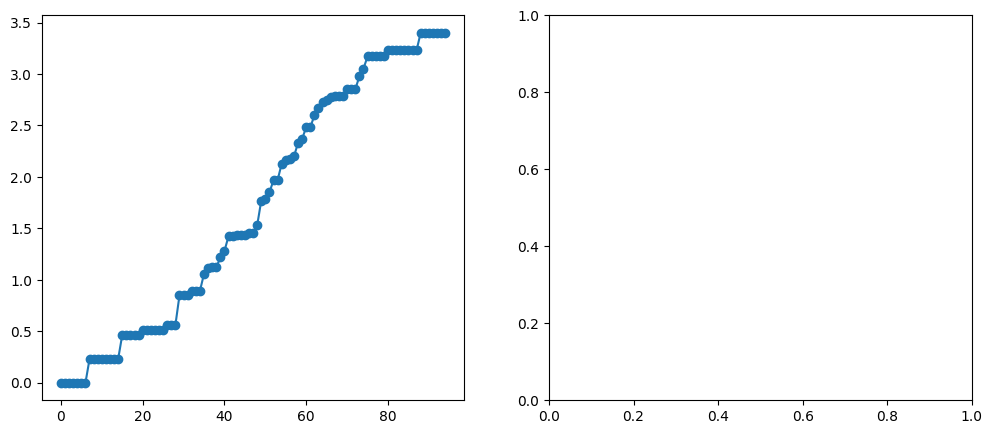

In [76]:
num_variables_list = [str(num).zfill(3) for num in range(20,22, 2)] 
graph_type_list = ['050']


r_list = range(100,101)
tau_list =[0.3] # [0.3, 0.4]
alpha_list = [0.01]
layer = 1
shots = None
tot_steps = range(5)
ifadsorting = False

num_opt_list = [1,2,3]
color_list = ["green", "blue", "red"]
f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

for taui, tau in enumerate(tau_list):

    for if_adsorting in [False]:

        density_list = []

        for igraph, graph in enumerate(graph_type_list):

            dir_0 = './data_iter_adap_sorting' + '/graph_{}/shots_{}'\
                                    .format(graph,  shots)

            ar_array = np.zeros(len(num_variables_list))
            for n_qubits_i, num_variables in enumerate(num_variables_list):
                n_qubits = int(num_variables)

                N = n_qubits
                
                if graph == 'complete':
                    # pairs_all = list(itertools.chain.from_iterable(partition_N(n_qubits)))
                    # num_pairs = len(pairs_all)
                    # num_params = (n_qubits + 2*num_pairs) * layer
                    # print(num_pairs, num_params)
                    density =1
                    num_params = int(2*(N-1)*N/2 + N)
                elif graph == '3regular':
                    num_params= int(2*(3*N)/2 + N)
                    density = ((3*N)/2)/((N-1)*N/2 )
                else:
                    density = float(f"0.{int(graph)}")
                    num_params = 2*round((N-1)*N*density/2) +N

                density_list.append(density)

                for alpha in alpha_list:

                    print("\ntau = ", tau, "alpha = ", alpha, "qubits = ", N, "parameters =", num_params)

                    dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}'\
                                        .format(num_variables, num_params, layer, alpha)
                    
                    max_entropy = 0 

                    for r in r_list:
                                                # filename = f"./data_sorting/ansatz_type_structure_like_qubo_YZ_2/shots_None/layer_1/alpha_{alpha}/initial_warm_start_measure/r_{r}/tau_{tau}_random.pkl"
                        
                        file_dir_name = dir_name + '/r_{}'\
                                    .format(r)
                        
                        filename = file_dir_name + '/ifadsorting_{}_tau_{}.pkl'\
                                                                .format(if_adsorting,tau)
                        with open(filename, 'rb') as f:
                            data = pickle.load(f)

                        params_list = data["params_list"]
                        if len(params_list) != round(num_params):
                            print("error N, r = ", r, len(params_list))
                            
                        # steps_exp_poss_dict = data["steps_exp_poss_dict"]
                        # steps_cvar_dict = data["steps_cvar_dict"]
                        steps_entropy_dict = data["steps_entropy_dict"]

                        entropi = data['entropy_list']
                        print(entropi)
                        print(len(entropi))

print(round((0.5*n_qubits*(n_qubits-1)/2)))

edgi = round((0.5*n_qubits*(n_qubits-1)/2))

ax1.plot(range(edgi), entropi, "o-", label=f"linear")

print(steps_entropy_dict)
print(max(entropi))


STOP HERE!!!!!!!!


 step =  4 tau =  0.3 alpha =  0.01 N = 16

 step =  4 tau =  0.6 alpha =  0.01 N = 16
sr_array =  [[0.98 0.8 ]
 [0.99 0.9 ]
 [0.   0.  ]]
ar_array =  [[0.99971794 0.99048889]
 [0.99985202 0.99681511]
 [0.         0.        ]]

 step =  4 tau =  0.3 alpha =  0.01 N = 18

 step =  4 tau =  0.6 alpha =  0.01 N = 18
sr_array =  [[0.96 0.66]
 [0.96 0.79]
 [0.   0.  ]]
ar_array =  [[0.99971446 0.98513275]
 [0.99938582 0.99419626]
 [0.         0.        ]]

 step =  4 tau =  0.3 alpha =  0.01 N = 20

 step =  4 tau =  0.6 alpha =  0.01 N = 20
sr_array =  [[0.87 0.7 ]
 [0.93 0.8 ]
 [0.   0.  ]]
ar_array =  [[0.99530628 0.9845846 ]
 [0.99756299 0.99229514]
 [0.         0.        ]]


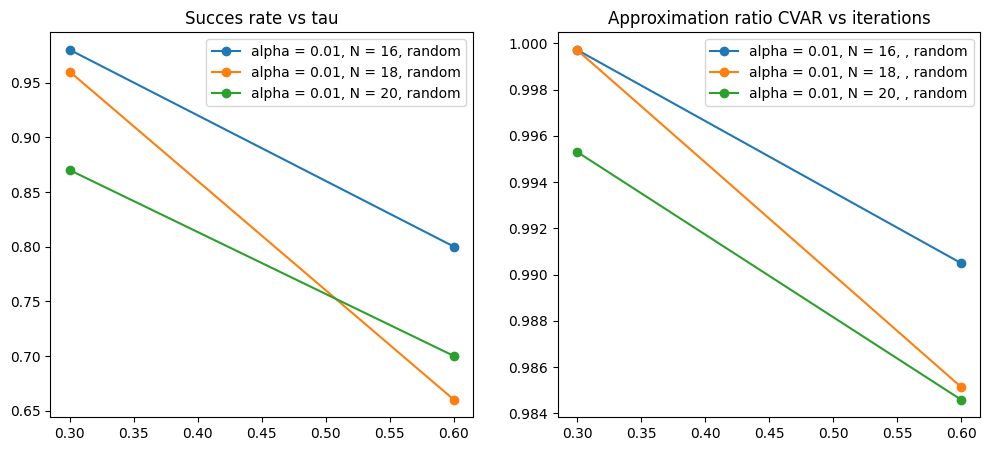

In [117]:
r_list = range(100)
tau_list = [0.3,0.6]
alpha_list = [0.01]

tot_steps = range(5)


num_opt_list = [1,2,3]
color_list = ["green", "blue", "red"]
f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

dir_0 = './data_iter' + '/ansatz_type_{}/shots_{}'\
                        .format(ansatz_type,  shots)

dir_0_adap =  './data_iter_adap_sorting' + '/ansatz_type_{}/shots_{}'\
                        .format(ansatz_type,  shots)

alpha = 0.01 
tau = 0.3

num_variables_list = [str(num).zfill(3) for num in range(16,22, 2)] 

for num_variables in num_variables_list:


    sr_array = np.zeros((len(num_opt_list), len(tau_list)))
    ar_array = np.zeros((len(num_opt_list), len(tau_list)))


    n_qubits = int(num_variables)

    N = n_qubits

    pairs_all = list(itertools.chain.from_iterable(partition_N(n_qubits)))
    num_pairs = len(pairs_all)
    num_params = (n_qubits + 2*num_pairs) * layer

    for taui, tau in enumerate(tau_list):
        print("\n step = ", step, "tau = ", tau, "alpha = ", alpha, "N =", N)

        dir_name =  '/num_variables_{}/params_{}_layer_{}/alpha_{}/initial_{}'\
                    .format(num_variables, num_params, layer, alpha, initialization)

        
        for r in r_list:
            # filename = f"./data_sorting/ansatz_type_structure_like_qubo_YZ_2/shots_None/layer_1/alpha_{alpha}/initial_warm_start_measure/r_{r}/tau_{tau}_random.pkl"

            file_dir_name = dir_name + '/r_{}'\
                                .format(r)
            
            filename = dir_0 + file_dir_name + '/tau_{}_random.pkl'.format(tau)
                            
            with open(filename, 'rb') as f:
                data = pickle.load(f)

            filename_adap = dir_0_adap + file_dir_name + '/tau_{}.pkl'.format(tau)
                            
            with open(filename_adap, 'rb') as f:
                data_adap = pickle.load(f)

            params_list = data["params_list"]
            if len(params_list) != round(N**2):
                print("error N, r = ", r, len(params_list))

            params_list = data_adap["params_list"]
            if len(params_list) != round(N**2):
                print("error N, r = ", r, len(params_list))

            steps_exp_poss_dict = data["steps_exp_poss_dict"]
            steps_cvar_dict = data["steps_cvar_dict"]
            final_exp_poss = steps_exp_poss_dict[f"step_{len(tot_steps)-1}"]["l_1"]
            poss_list = list(final_exp_poss.values())

            steps_exp_poss_dict_adap = data_adap["steps_exp_poss_dict"]
            steps_cvar_dict_adap = data_adap["steps_cvar_dict"]
            final_exp_poss_adap = steps_exp_poss_dict_adap[f"step_{len(tot_steps)-1}"]["l_1"]
            poss_list_adap = list(final_exp_poss_adap.values())


            if poss_list[0] > alpha:
                sr_array[0, taui] += 1/len(r_list)
            if poss_list_adap[0] > alpha:
                sr_array[1, taui] += 1/len(r_list)

            # if sum(poss_list[:3]) > alpha:
            #     sr_array[2, step] += 1/len(r_list)

            exp_opt = list(final_exp_poss.keys())[0]
            cvar = steps_cvar_dict[f"step_{len(tot_steps)-1}"]

            ar_array[0,taui] += (cvar/exp_opt) / len(r_list)

            exp_opt = list(final_exp_poss_adap.keys())[0]
            cvar = steps_cvar_dict_adap[f"step_{len(tot_steps)-1}"]

            ar_array[1,taui] += (cvar/exp_opt) / len(r_list)

    
    print("sr_array = ", sr_array)
    ax1.plot(tau_list, sr_array[0], "o-", label=f"alpha = {alpha}, N = {N}, random")
    # ax1.plot(tau_list, sr_array[1], "o--",label=f"alpha = {alpha}, N = {N}, adap")
    # ax1.plot(tot_steps, sr_array[2], "o:",label=f"alpha = {alpha}, num_opt = 3")

    ax2.plot(tau_list, ar_array[0], "o-", label=f"alpha = {alpha}, N = {N}, , random")
    # ax2.plot(tau_list, ar_array[1], "o-", label=f"alpha = {alpha}, N = {N}, adap")

    ax1.set_title('Succes rate vs tau')
    ax2.set_title('Approximation ratio CVAR vs iterations')

    ax1.legend()
    print("ar_array = ", ar_array)
plt.legend()
# plt.xlabel("iterations")
# plt.ylabel("success rate")
plt.show()

COMPARE ALL SORTING


 step =  4 tau =  0.3 alpha =  0.01 N = 20
sr_array =  [[0.03 0.84 0.87 0.87 0.87]
 [0.06 0.85 0.92 0.93 0.93]
 [0.04 0.83 0.87 0.88 0.89]
 [0.03 0.78 0.9  0.9  0.9 ]
 [0.03 0.81 0.9  0.91 0.91]
 [0.11 0.92 0.93 0.93 0.93]]
ar_array =  [[0.97317182 0.99541322 0.99534904 0.99530629 0.99530628]
 [0.97691011 0.99705865 0.99784908 0.99790008 0.99790008]
 [0.97219816 0.99408728 0.99570863 0.9961429  0.99625651]
 [0.97024725 0.99681687 0.99811657 0.99811328 0.99811328]
 [0.97544562 0.99712407 0.99778036 0.99777376 0.99799523]
 [0.983107   0.99745258 0.99734476 0.99756363 0.99756299]]
sr_array =  [[0.03 0.84 0.87 0.87 0.87]
 [0.06 0.85 0.92 0.93 0.93]
 [0.04 0.83 0.87 0.88 0.89]
 [0.03 0.78 0.9  0.9  0.9 ]
 [0.03 0.81 0.9  0.91 0.91]
 [0.11 0.92 0.93 0.93 0.93]]
ar_array =  [[0.97317182 0.99541322 0.99534904 0.99530629 0.99530628]
 [0.97691011 0.99705865 0.99784908 0.99790008 0.99790008]
 [0.97219816 0.99408728 0.99570863 0.9961429  0.99625651]
 [0.97024725 0.99681687 0.99811657 0.99811328 0

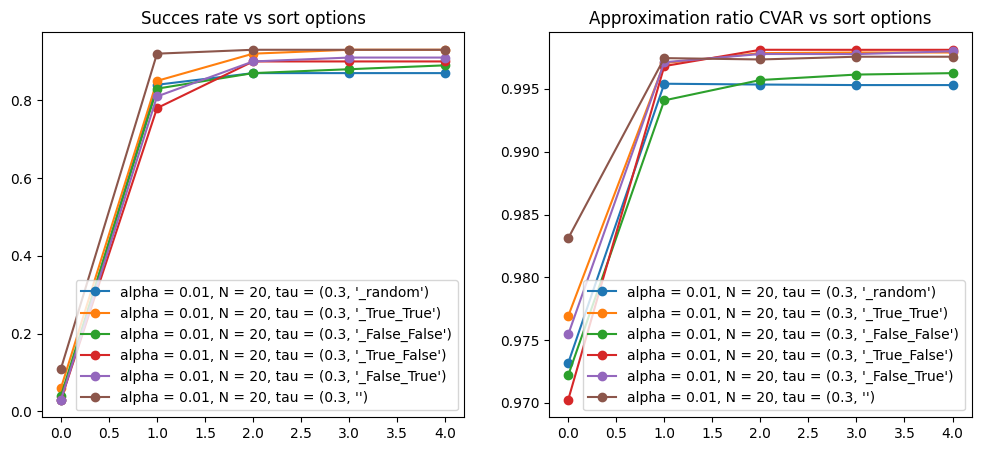

In [134]:
r_list = range(100)
tau_list = [0.3]
alpha_list = [0.01]

tot_steps = range(5)

sortoptions = ['_random', '_True_True', '_False_False', '_True_False', '_False_True', '']

num_opt_list = [1,2,3]
color_list = ["green", "blue", "red"]
f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

dir_0 = './data_iter' + '/ansatz_type_{}/shots_{}'\
                        .format(ansatz_type,  shots)

dir_0_adap =  './data_iter_adap_sorting' + '/ansatz_type_{}/shots_{}'\
                        .format(ansatz_type,  shots)

alpha = 0.01 
tau = 0.3

num_variables_list = [str(num).zfill(3) for num in range(20,22, 2)] 

for num_variables in num_variables_list:



    n_qubits = int(num_variables)

    N = n_qubits

    pairs_all = list(itertools.chain.from_iterable(partition_N(n_qubits)))
    num_pairs = len(pairs_all)
    num_params = (n_qubits + 2*num_pairs) * layer

    for taui, tau in enumerate(tau_list):
        print("\n step = ", step, "tau = ", tau, "alpha = ", alpha, "N =", N)

        dir_name =  '/num_variables_{}/params_{}_layer_{}/alpha_{}/initial_{}'\
                    .format(num_variables, num_params, layer, alpha, initialization)
        
        sr_array = np.zeros((len(sortoptions), len(tot_steps)))
        ar_array = np.zeros((len(sortoptions), len(tot_steps)))

        for step in tot_steps:
            for r in r_list:
                # filename = f"./data_sorting/ansatz_type_structure_like_qubo_YZ_2/shots_None/layer_1/alpha_{alpha}/initial_warm_start_measure/r_{r}/tau_{tau}_random.pkl"
                
                for optioni,option in enumerate(sortoptions):

                    file_dir_name = dir_name + '/r_{}'\
                                        .format(r)
                    
                    
                    if option == '':
                        filename = dir_0_adap + file_dir_name + '/tau_{}{}.pkl'.format(tau, option)
                                        
                        with open(filename, 'rb') as f:
                            data = pickle.load(f)

                    else:
                        filename = dir_0 + file_dir_name + '/tau_{}{}.pkl'.format(tau,option)
                                        
                        with open(filename, 'rb') as f:
                            data = pickle.load(f)

                    params_list = data["params_list"]
                    if len(params_list) != round(N**2):
                        print("error N, r = ", r, len(params_list))

                    steps_exp_poss_dict = data["steps_exp_poss_dict"]
                    steps_cvar_dict = data["steps_cvar_dict"]
                    final_exp_poss = steps_exp_poss_dict[f"step_{step}"]["l_1"]
                    poss_list = list(final_exp_poss.values())

                    if poss_list[0] > alpha:
                        sr_array[optioni, step] += 1/len(r_list)

                    exp_opt = list(final_exp_poss.keys())[0]
                    cvar = steps_cvar_dict[f"step_{step}"]

                    ar_array[optioni,step] += (cvar/exp_opt) / len(r_list)
        
        for optioni, option in enumerate(sortoptions):
            print("sr_array = ", sr_array)
            ax1.plot(tot_steps, sr_array[optioni], "o-", label=f"alpha = {alpha}, N = {N}, tau = {tau, option}")
            # ax1.plot(range(sortoptions), sr_array[1], "o--",label=f"alpha = {alpha}, N = {N}, adap")
            # ax1.plot(tot_steps, sr_array[2], "o:",label=f"alpha = {alpha}, num_opt = 3")

            ax2.plot(tot_steps, ar_array[optioni], "o-", label=f"alpha = {alpha}, N = {N}, tau = {tau, option}")
            # ax2.plot(range(sortoptions), ar_array[1], "o-", label=f"alpha = {alpha}, N = {N}, adap")

            ax1.set_title('Succes rate vs sort options')
            ax2.set_title('Approximation ratio CVAR vs sort options')

            ax1.legend()
            print("ar_array = ", ar_array)

plt.legend()
# plt.xlabel("iterations")
# plt.ylabel("success rate")
plt.show()


 step =  4 tau =  0.3 alpha =  0.01 N = 20
sr_array =  [[0.87 0.93 0.89 0.9  0.91 0.93]
 [0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.  ]]
ar_array =  [[0.99530628 0.99790008 0.99625651 0.99811328 0.99799523 0.99756299]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]

 step =  4 tau =  0.6 alpha =  0.01 N = 20
sr_array =  [[0.7  0.7  0.59 0.68 0.7  0.8 ]
 [0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.  ]]
ar_array =  [[0.9845846  0.98484353 0.97981234 0.9812404  0.98508647 0.99229514]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]


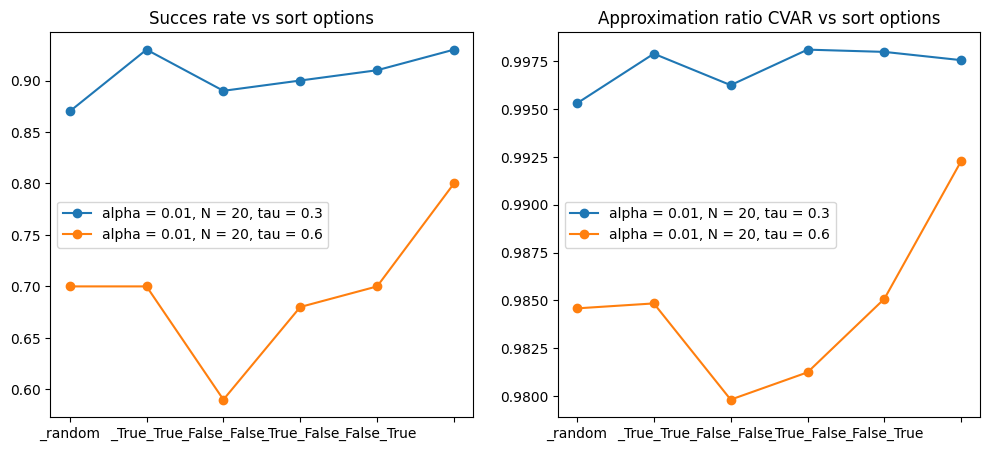

In [107]:
r_list = range(100)
tau_list = [0.3, 0.6]
alpha_list = [0.01]

tot_steps = range(5)

sortoptions = ['_random', '_True_True', '_False_False', '_True_False', '_False_True', '']

num_opt_list = [1,2,3]
color_list = ["green", "blue", "red"]
f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

dir_0 = './data_iter' + '/ansatz_type_{}/shots_{}'\
                        .format(ansatz_type,  shots)

dir_0_adap =  './data_iter_adap_sorting' + '/ansatz_type_{}/shots_{}'\
                        .format(ansatz_type,  shots)

alpha = 0.01 
tau = 0.3

num_variables_list = [str(num).zfill(3) for num in range(20,22, 2)] 

for num_variables in num_variables_list:



    n_qubits = int(num_variables)

    N = n_qubits

    pairs_all = list(itertools.chain.from_iterable(partition_N(n_qubits)))
    num_pairs = len(pairs_all)
    num_params = (n_qubits + 2*num_pairs) * layer

    for taui, tau in enumerate(tau_list):
        print("\n step = ", step, "tau = ", tau, "alpha = ", alpha, "N =", N)

        sr_array = np.zeros((len(num_opt_list), len(sortoptions)))
        ar_array = np.zeros((len(num_opt_list), len(sortoptions)))

        dir_name =  '/num_variables_{}/params_{}_layer_{}/alpha_{}/initial_{}'\
                    .format(num_variables, num_params, layer, alpha, initialization)
        
        for r in r_list:
            # filename = f"./data_sorting/ansatz_type_structure_like_qubo_YZ_2/shots_None/layer_1/alpha_{alpha}/initial_warm_start_measure/r_{r}/tau_{tau}_random.pkl"
            
            for optioni,option in enumerate(sortoptions):
                file_dir_name = dir_name + '/r_{}'\
                                    .format(r)
                
                
                if option == '':
                    filename = dir_0_adap + file_dir_name + '/tau_{}{}.pkl'.format(tau, option)
                                    
                    with open(filename, 'rb') as f:
                        data = pickle.load(f)

                else:
                    filename = dir_0 + file_dir_name + '/tau_{}{}.pkl'.format(tau,option)
                                    
                    with open(filename, 'rb') as f:
                        data = pickle.load(f)

                params_list = data["params_list"]
                if len(params_list) != round(N**2):
                    print("error N, r = ", r, len(params_list))


                steps_exp_poss_dict = data["steps_exp_poss_dict"]
                steps_cvar_dict = data["steps_cvar_dict"]
                final_exp_poss = steps_exp_poss_dict[f"step_{len(tot_steps)-1}"]["l_1"]
                poss_list = list(final_exp_poss.values())

                if poss_list[0] > alpha:
                    sr_array[0, optioni] += 1/len(r_list)

                exp_opt = list(final_exp_poss.keys())[0]
                cvar = steps_cvar_dict[f"step_{len(tot_steps)-1}"]

                ar_array[0,optioni] += (cvar/exp_opt) / len(r_list)
        
        print("sr_array = ", sr_array)
        ax1.plot(sortoptions, sr_array[0], "o-", label=f"alpha = {alpha}, N = {N}, tau = {tau}")
        # ax1.plot(range(sortoptions), sr_array[1], "o--",label=f"alpha = {alpha}, N = {N}, adap")
        # ax1.plot(tot_steps, sr_array[2], "o:",label=f"alpha = {alpha}, num_opt = 3")

        ax2.plot(sortoptions, ar_array[0], "o-", label=f"alpha = {alpha}, N = {N}, tau = {tau}")
        # ax2.plot(range(sortoptions), ar_array[1], "o-", label=f"alpha = {alpha}, N = {N}, adap")

        ax1.set_title('Succes rate vs sort options')
        ax2.set_title('Approximation ratio CVAR vs sort options')

        ax1.legend()
        print("ar_array = ", ar_array)

plt.legend()
# plt.xlabel("iterations")
# plt.ylabel("success rate")
plt.show()


 step =  4 tau =  0.3 alpha =  0.01 N = 16
sr_array =  [[0.98 0.97 0.97 0.98 0.97 0.99]
 [0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.  ]]
ar_array =  [[0.99971794 0.9995134  0.99967675 0.9997247  0.99935139 0.99985202]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]

 step =  4 tau =  0.3 alpha =  0.01 N = 18
sr_array =  [[0.96 0.94 0.94 0.93 0.93 0.96]
 [0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.  ]]
ar_array =  [[0.99971446 0.99788095 0.99915737 0.99882904 0.99831035 0.99938582]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]

 step =  4 tau =  0.3 alpha =  0.01 N = 20
sr_array =  [[0.87 0.93 0.89 0.9  0.91 0.93]
 [0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.  ]]
ar_array =  [[0.99530628 0.99790008 0.99625651 0.99811328 0.99799523 0.99756299]
 [0.       

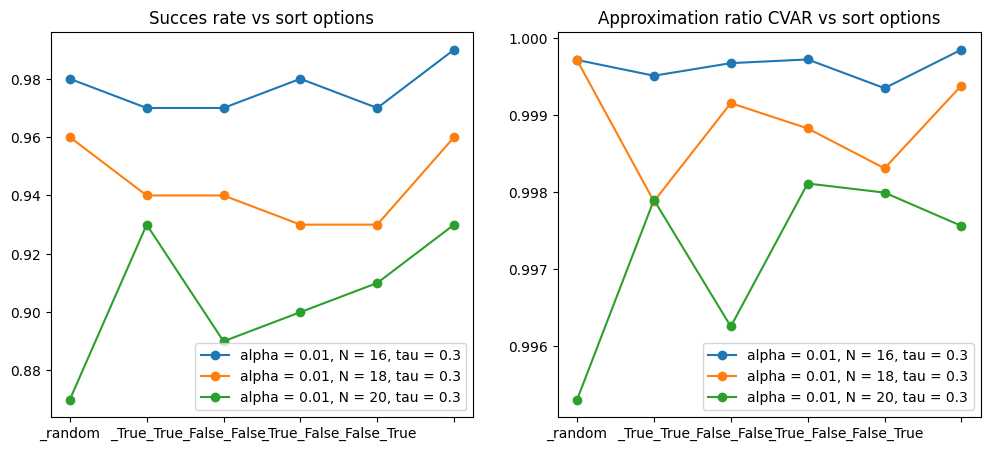

In [135]:
r_list = range(100)
tau_list = [0.3]
alpha_list = [0.01]

tot_steps = range(5)

sortoptions = ['_random', '_True_True', '_False_False', '_True_False', '_False_True', '']

num_opt_list = [1,2,3]
color_list = ["green", "blue", "red"]
f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

dir_0 = './data_iter' + '/ansatz_type_{}/shots_{}'\
                        .format(ansatz_type,  shots)

dir_0_adap =  './data_iter_adap_sorting' + '/ansatz_type_{}/shots_{}'\
                        .format(ansatz_type,  shots)

alpha = 0.01 
tau = 0.3

num_variables_list = [str(num).zfill(3) for num in range(16,22, 2)] 

for num_variables in num_variables_list:



    n_qubits = int(num_variables)

    N = n_qubits

    pairs_all = list(itertools.chain.from_iterable(partition_N(n_qubits)))
    num_pairs = len(pairs_all)
    num_params = (n_qubits + 2*num_pairs) * layer

    for taui, tau in enumerate(tau_list):
        print("\n step = ", step, "tau = ", tau, "alpha = ", alpha, "N =", N)

        sr_array = np.zeros((len(num_opt_list), len(sortoptions)))
        ar_array = np.zeros((len(num_opt_list), len(sortoptions)))

        dir_name =  '/num_variables_{}/params_{}_layer_{}/alpha_{}/initial_{}'\
                    .format(num_variables, num_params, layer, alpha, initialization)
        
        for r in r_list:
            # filename = f"./data_sorting/ansatz_type_structure_like_qubo_YZ_2/shots_None/layer_1/alpha_{alpha}/initial_warm_start_measure/r_{r}/tau_{tau}_random.pkl"
            
            for optioni,option in enumerate(sortoptions):
                file_dir_name = dir_name + '/r_{}'\
                                    .format(r)
                
                
                if option == '':
                    filename = dir_0_adap + file_dir_name + '/tau_{}{}.pkl'.format(tau, option)
                                    
                    with open(filename, 'rb') as f:
                        data = pickle.load(f)

                else:
                    filename = dir_0 + file_dir_name + '/tau_{}{}.pkl'.format(tau,option)
                                    
                    with open(filename, 'rb') as f:
                        data = pickle.load(f)

                params_list = data["params_list"]
                if len(params_list) != round(N**2):
                    print("error N, r = ", r, len(params_list))


                steps_exp_poss_dict = data["steps_exp_poss_dict"]
                steps_cvar_dict = data["steps_cvar_dict"]
                final_exp_poss = steps_exp_poss_dict[f"step_{len(tot_steps)-1}"]["l_1"]
                poss_list = list(final_exp_poss.values())

                if poss_list[0] > alpha:
                    sr_array[0, optioni] += 1/len(r_list)

                exp_opt = list(final_exp_poss.keys())[0]
                cvar = steps_cvar_dict[f"step_{len(tot_steps)-1}"]

                ar_array[0,optioni] += (cvar/exp_opt) / len(r_list)
        
        print("sr_array = ", sr_array)
        ax1.plot(sortoptions, sr_array[0], "o-", label=f"alpha = {alpha}, N = {N}, tau = {tau}")
        # ax1.plot(range(sortoptions), sr_array[1], "o--",label=f"alpha = {alpha}, N = {N}, adap")
        # ax1.plot(tot_steps, sr_array[2], "o:",label=f"alpha = {alpha}, num_opt = 3")

        ax2.plot(sortoptions, ar_array[0], "o-", label=f"alpha = {alpha}, N = {N}, tau = {tau}")
        # ax2.plot(range(sortoptions), ar_array[1], "o-", label=f"alpha = {alpha}, N = {N}, adap")

        ax1.set_title('Succes rate vs sort options')
        ax2.set_title('Approximation ratio CVAR vs sort options')

        ax1.legend()
        print("ar_array = ", ar_array)

plt.legend()
# plt.xlabel("iterations")
# plt.ylabel("success rate")
plt.show()

STOP HERE!!!!!!!!!!!!!!!!!!!!!


tau =  0.05 alpha =  0.01

tau =  0.1 alpha =  0.01

tau =  0.2 alpha =  0.01

tau =  0.4 alpha =  0.01

tau =  0.6 alpha =  0.01
sr_array =  [[0.78 0.88 0.89 0.83 0.7 ]
 [0.89 0.94 0.96 0.88 0.78]
 [0.92 0.97 0.99 0.91 0.82]]
ar_array =  [0.99113628 0.99661714 0.99751693 0.99398891 0.98458413]


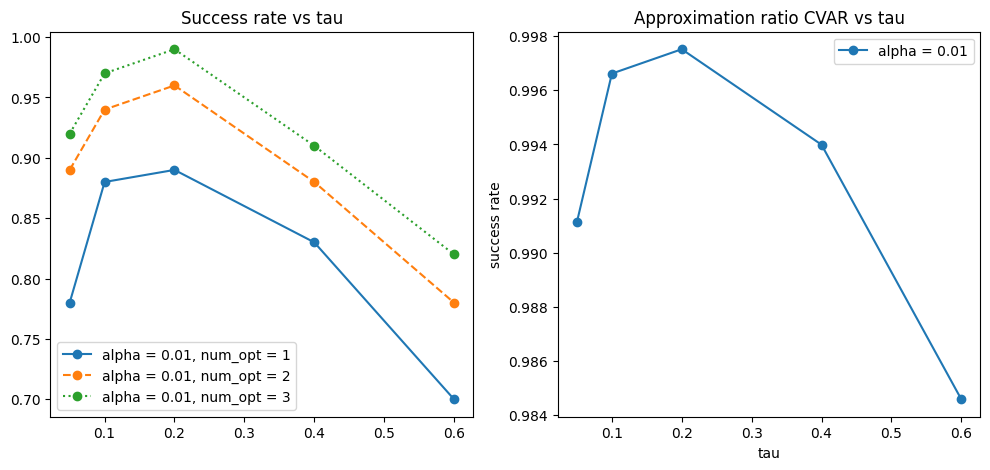

In [69]:
N=20
r_list = range(100)
tau_list = [0.05, 0.1, 0.2, 0.4, 0.6]
alpha_list = [0.01]

num_opt_list = [1,2,3]
color_list = ["green", "blue", "red"]
f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
for alpha in alpha_list:
    sr_array = np.zeros((len(num_opt_list), len(tau_list)))
    ar_array = np.zeros(len(tau_list))
    for taui, tau in enumerate(tau_list):
        print("\ntau = ", tau, "alpha = ", alpha)
        for r in r_list:
            filename = f"./data_sorting/ansatz_type_structure_like_qubo_YZ_2/shots_None/layer_1/alpha_{alpha}/initial_warm_start_measure/r_{r}/tau_{tau}_random.pkl"
            with open(filename, 'rb') as f:
                data = pickle.load(f)
            params_list = data["params_list"]
            if len(params_list) != round(N**2):
                print("error N, r = ", r, len(params_list))
            steps_exp_poss_dict = data["steps_exp_poss_dict"]
            steps_cvar_dict = data["steps_cvar_dict"]
            
            final_exp_poss = steps_exp_poss_dict["step_5"]["l_1"]
            poss_list = list(final_exp_poss.values())
            if poss_list[0] > alpha:
                sr_array[0, taui] += 1/len(r_list)
            if sum(poss_list[:2]) > alpha:
                sr_array[1, taui] += 1/len(r_list)
            if sum(poss_list[:3]) > alpha:
                sr_array[2, taui] += 1/len(r_list)

            exp_opt = list(final_exp_poss.keys())[0]
            cvar = steps_cvar_dict["step_9"]
            ar_array[taui] += (cvar/exp_opt) / len(r_list)

    print("sr_array = ", sr_array)
    ax1.plot(tau_list, sr_array[0], "o-", label=f"alpha = {alpha}, num_opt = 1")
    ax1.plot(tau_list, sr_array[1], "o--",label=f"alpha = {alpha}, num_opt = 2")
    ax1.plot(tau_list, sr_array[2], "o:",label=f"alpha = {alpha}, num_opt = 3")

    ax2.plot(tau_list, ar_array, "o-", label=f"alpha = {alpha}")
    print("ar_array = ", ar_array)

    ax1.set_title('Success rate vs tau')
    ax2.set_title('Approximation ratio CVAR vs tau')

    ax1.legend()
plt.legend()
plt.xlabel("tau")
plt.ylabel("success rate")
plt.show()



In [45]:
steps_exp_poss_dict.keys()

dict_keys(['step_0', 'step_1', 'step_2', 'step_3', 'step_4', 'step_5', 'step_6', 'step_7', 'step_8', 'step_9'])


 step =  0 tau =  0.2 alpha =  0.01

 step =  1 tau =  0.2 alpha =  0.01

 step =  2 tau =  0.2 alpha =  0.01

 step =  3 tau =  0.2 alpha =  0.01

 step =  4 tau =  0.2 alpha =  0.01

 step =  5 tau =  0.2 alpha =  0.01

 step =  6 tau =  0.2 alpha =  0.01

 step =  7 tau =  0.2 alpha =  0.01

 step =  8 tau =  0.2 alpha =  0.01

 step =  9 tau =  0.2 alpha =  0.01
sr_array =  [[0.   0.82 0.88 0.89 0.89 0.89 0.89 0.89 0.89 0.89]
 [0.   0.89 0.92 0.95 0.95 0.96 0.96 0.96 0.96 0.96]
 [0.   0.94 0.97 0.99 0.99 0.99 0.99 0.99 0.99 0.99]]
ar_array =  [0.95654325 0.99600428 0.99727966 0.99754692 0.99749912 0.99751693
 0.99751693 0.99751693 0.99751693 0.99751693]


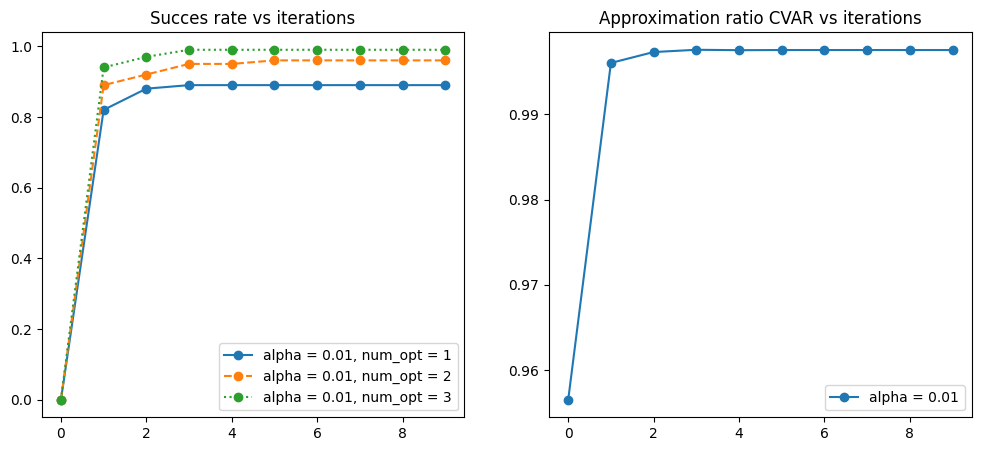

In [70]:
N=20
r_list = range(100)
tau_list = [0.6]
alpha_list = [0.01]

tot_steps = range(10)

num_opt_list = [1,2,3]
color_list = ["green", "blue", "red"]
f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

sr_array = np.zeros((len(num_opt_list), len(tot_steps)))
ar_array = np.zeros(len(tot_steps))

alpha = 0.01 
tau = 0.2

for step in tot_steps:
    print("\n step = ", step, "tau = ", tau, "alpha = ", alpha)
    for r in r_list:
        filename = f"./data_sorting/ansatz_type_structure_like_qubo_YZ_2/shots_None/layer_1/alpha_{alpha}/initial_warm_start_measure/r_{r}/tau_{tau}_random.pkl"
        with open(filename, 'rb') as f:
            data = pickle.load(f)
        params_list = data["params_list"]
        if len(params_list) != round(N**2):
            print("error N, r = ", r, len(params_list))
        steps_exp_poss_dict = data["steps_exp_poss_dict"]
        steps_cvar_dict = data["steps_cvar_dict"]
        
        final_exp_poss = steps_exp_poss_dict[f"step_{step}"]["l_1"]
        # print(len( steps_exp_poss_dict[f"step_{step}"]["l_1"]))
        # print( steps_exp_poss_dict[f"step_{step}"]["l_1"])
        poss_list = list(final_exp_poss.values())
        # print(len(poss_list))
        # print(poss_list)
        if poss_list[0] > alpha:
            sr_array[0, step] += 1/len(r_list)
        if sum(poss_list[:2]) > alpha:
            sr_array[1, step] += 1/len(r_list)
        if sum(poss_list[:3]) > alpha:
            sr_array[2, step] += 1/len(r_list)

        exp_opt = list(final_exp_poss.keys())[0]
        # print(exp_opt)
        cvar = steps_cvar_dict[f"step_{step}"]
        ar_array[step] += (cvar/exp_opt) / len(r_list)

print("sr_array = ", sr_array)
ax1.plot(tot_steps, sr_array[0], "o-", label=f"alpha = {alpha}, num_opt = 1")
ax1.plot(tot_steps, sr_array[1], "o--",label=f"alpha = {alpha}, num_opt = 2")
ax1.plot(tot_steps, sr_array[2], "o:",label=f"alpha = {alpha}, num_opt = 3")

ax2.plot(tot_steps, ar_array, "o-", label=f"alpha = {alpha}")

ax1.set_title('Succes rate vs iterations')
ax2.set_title('Approximation ratio CVAR vs iterations')

ax1.legend()
print("ar_array = ", ar_array)
plt.legend()
# plt.xlabel("iterations")
# plt.ylabel("success rate")
plt.show()


 step =  0 tau =  0.05 alpha =  0.01

 step =  1 tau =  0.05 alpha =  0.01

 step =  2 tau =  0.05 alpha =  0.01

 step =  3 tau =  0.05 alpha =  0.01

 step =  4 tau =  0.05 alpha =  0.01

 step =  5 tau =  0.05 alpha =  0.01

 step =  6 tau =  0.05 alpha =  0.01

 step =  7 tau =  0.05 alpha =  0.01

 step =  8 tau =  0.05 alpha =  0.01

 step =  9 tau =  0.05 alpha =  0.01
sr_array =  [[0.   0.01 0.58 0.75 0.78 0.78 0.78 0.78 0.78 0.78]
 [0.   0.07 0.69 0.87 0.88 0.89 0.89 0.89 0.89 0.89]
 [0.   0.09 0.76 0.9  0.91 0.92 0.92 0.92 0.92 0.92]]
ar_array =  [0.75121232 0.91097421 0.98177961 0.98982886 0.9904619  0.99058298
 0.99113628 0.99113628 0.99113628 0.99113628]

 step =  0 tau =  0.1 alpha =  0.01

 step =  1 tau =  0.1 alpha =  0.01

 step =  2 tau =  0.1 alpha =  0.01

 step =  3 tau =  0.1 alpha =  0.01

 step =  4 tau =  0.1 alpha =  0.01

 step =  5 tau =  0.1 alpha =  0.01

 step =  6 tau =  0.1 alpha =  0.01

 step =  7 tau =  0.1 alpha =  0.01

 step =  8 tau =  0.1 alph

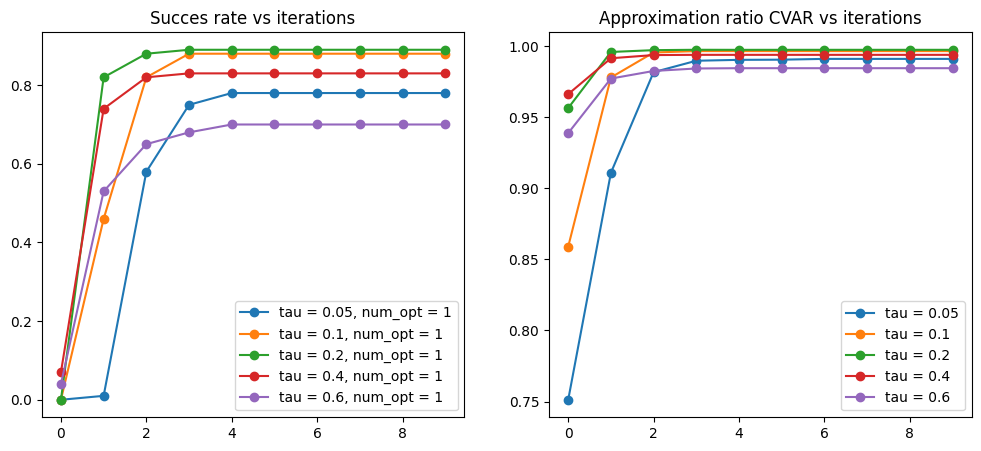

In [67]:
N=20
r_list = range(100)
tau_list = [0.05, 0.1, 0.2, 0.4, 0.6]
alpha_list = [0.01]

tot_steps = range(10)

num_opt_list = [1,2,3]
color_list = ["green", "blue", "red"]
f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

alpha = 0.01 
tau = 0.6

for tau in tau_list:
    sr_array = np.zeros((len(num_opt_list), len(tot_steps)))
    ar_array = np.zeros(len(tot_steps)) 
    for step in tot_steps:
        print("\n step = ", step, "tau = ", tau, "alpha = ", alpha)
        for r in r_list:
            filename = f"./data_sorting/ansatz_type_structure_like_qubo_YZ_2/shots_None/layer_1/alpha_{alpha}/initial_warm_start_measure/r_{r}/tau_{tau}_random.pkl"
            with open(filename, 'rb') as f:
                data = pickle.load(f)
            params_list = data["params_list"]
            if len(params_list) != round(N**2):
                print("error N, r = ", r, len(params_list))
            steps_exp_poss_dict = data["steps_exp_poss_dict"]
            steps_cvar_dict = data["steps_cvar_dict"]
            
            final_exp_poss = steps_exp_poss_dict[f"step_{step}"]["l_1"]
            # print(len( steps_exp_poss_dict[f"step_{step}"]["l_1"]))
            # print( steps_exp_poss_dict[f"step_{step}"]["l_1"])
            poss_list = list(final_exp_poss.values())
            # print(len(poss_list))
            # print(poss_list)
            if poss_list[0] > alpha:
                sr_array[0, step] += 1/len(r_list)
            if sum(poss_list[:2]) > alpha:
                sr_array[1, step] += 1/len(r_list)
            if sum(poss_list[:3]) > alpha:
                sr_array[2, step] += 1/len(r_list)

            exp_opt = list(final_exp_poss.keys())[0]
            # print(exp_opt)
            cvar = steps_cvar_dict[f"step_{step}"]
            ar_array[step] += (cvar/exp_opt) / len(r_list)

    print("sr_array = ", sr_array)
    ax1.plot(tot_steps, sr_array[0], "o-", label=f"tau = {tau}, num_opt = 1")
    # ax1.plot(tot_steps, sr_array[1], "o--",label=f"alpha = {alpha}, num_opt = 2")
    # ax1.plot(tot_steps, sr_array[2], "o:",label=f"alpha = {alpha}, num_opt = 3")

    ax2.plot(tot_steps, ar_array, "o-", label=f"tau = {tau}")

    ax1.set_title('Succes rate vs iterations')
    ax2.set_title('Approximation ratio CVAR vs iterations')

    ax1.legend()
    print("ar_array = ", ar_array)
plt.legend()
# plt.xlabel("iterations")
# plt.ylabel("success rate")
plt.show()